<a href="https://colab.research.google.com/github/gregjohnallen-52/Open-Source-Data-Science-Project/blob/main/F1_logistic_regression_Modern_Era.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports and libraries

In [93]:
# importing of libraries
!pip install sweetviz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
import textwrap
from google.colab import drive

import warnings
warnings.filterwarnings('ignore')


Load Data

In [94]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [95]:
os.chdir('/content/drive/MyDrive/F1 Dataset')

In [96]:
df_full = pd.read_csv('Driver_Season_Full.csv')

# Data Engineering

### Performing Data Engineering with more complex tasks in python

In [97]:
df_full.head()

,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,DriverCumulativeWins,ConstructorCumulativeWins,DriverCumulativePodiums,ConstructorCumulativePodiums,DriverCumulativeChampionships,ConstructorCumulativeChampionships,DriverRacesEntered,ConstructorRacesEntered,DriverWonChampionship,ConstructorWonChampionship
0,2024,24,02/03/2024,1,hamilton,Lewis,Hamilton,British,07/01/1985,131,...,103,116,191,272,7,8,332,293,0,0
1,2024,24,02/03/2024,4,alonso,Fernando,Alonso,Spanish,29/07/1981,117,...,32,0,98,9,2,0,380,72,0,0
2,2024,24,02/03/2024,807,hulkenberg,Nico,Hülkenberg,German,19/08/1987,210,...,0,0,0,0,0,0,206,166,0,0
3,2024,24,02/03/2024,815,perez,Sergio,Pérez,Mexican,26/01/1990,9,...,4,113,26,264,0,6,259,370,0,0
4,2024,24,02/03/2024,817,ricciardo,Daniel,Ricciardo,Australian,01/07/1989,215,...,8,0,32,0,0,0,239,0,0,0


In [98]:
df_full.shape

(3553, 29)

In [99]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 29 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Season                                                  3553 non-null   int64  
 1   NumberofRounds                                          3553 non-null   int64  
 2   SeasonStartDate                                         3553 non-null   object 
 3   driverId                                                3553 non-null   int64  
 4   driverRef                                               3553 non-null   object 
 5   DriverFirstName                                         3553 non-null   object 
 6   DriverLastName                                          3553 non-null   object 
 7   DriverNationality                                       3553 non-null   object 
 8   DriverDOB                             

Blanks showing in DriverPreviousSeasonWins, DriverPreviousSeasonPodiums, ConstructorPreviousSeasonWins, ConstructorPreviousSeasonPodiums.
These need replacing with 0s as it is where driver/constructor did not screo win/podium in previous season. Type also needs changing to int64 as whole numbers.

Blanks also showing in Driver_Ave_Position_Last5_AvgPositionLast5Seasons and Constructor_Ave_Position_Last5_AvgPositionLast5Seasons. Again these need replacing as where driver/constructor wasn't present in last 5 seasons, however they will be replaced with 21 to simulate finishing last in a modern F1 race. Type is correct with float64.

DriverDOB column also contains blanks, and will need converting to datetime type, as will column SeasonStartDate.

In [100]:
# Previous Season columns to replace blanks with 0s and change to integer type
columns_to_process = [
    'DriverPreviousSeasonWins',
    'DriverPreviousSeasonPodiums',
    'ConstructorPreviousSeasonWins',
    'ConstructorPreviousSeasonPodiums'
]

# Replace blanks with 0s and change type to int64
for column in columns_to_process:
    df_full[column] = df_full[column].fillna(0).astype('int64')

# Display the updated dataframe info to confirm changes
df_full.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 29 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Season                                                  3553 non-null   int64  
 1   NumberofRounds                                          3553 non-null   int64  
 2   SeasonStartDate                                         3553 non-null   object 
 3   driverId                                                3553 non-null   int64  
 4   driverRef                                               3553 non-null   object 
 5   DriverFirstName                                         3553 non-null   object 
 6   DriverLastName                                          3553 non-null   object 
 7   DriverNationality                                       3553 non-null   object 
 8   DriverDOB                             

In [101]:
# Average postition columns to change blanks to 21
columns_to_process = [
    'Driver_Ave_Position_Last5_AvgPositionLast5Seasons',
    'Constructor_Ave_Position_Last5_AvgPositionLast5Seasons'
]

# Replace blanks with 21 to simulate a finish outside the number of drivers on a modern grid
for column in columns_to_process:
    df_full[column] = df_full[column].fillna(21)

# Display the updated dataframe info to confirm changes
df_full.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 29 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Season                                                  3553 non-null   int64  
 1   NumberofRounds                                          3553 non-null   int64  
 2   SeasonStartDate                                         3553 non-null   object 
 3   driverId                                                3553 non-null   int64  
 4   driverRef                                               3553 non-null   object 
 5   DriverFirstName                                         3553 non-null   object 
 6   DriverLastName                                          3553 non-null   object 
 7   DriverNationality                                       3553 non-null   object 
 8   DriverDOB                             

In [102]:

# Convert 'DriverDOB' and 'SeasonStartDate' columns to datetime
df_full['DriverDOB'] = pd.to_datetime(df_full['DriverDOB'], format='%d/%m/%Y')
df_full['SeasonStartDate'] = pd.to_datetime(df_full['SeasonStartDate'], format='%d/%m/%Y')

# Display the updated dataframe info to confirm changes
df_full.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 29 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3553 non-null   int64         
 1   NumberofRounds                                          3553 non-null   int64         
 2   SeasonStartDate                                         3553 non-null   datetime64[ns]
 3   driverId                                                3553 non-null   int64         
 4   driverRef                                               3553 non-null   object        
 5   DriverFirstName                                         3553 non-null   object        
 6   DriverLastName                                          3553 non-null   object        
 7   DriverNationality                                       3553

In [179]:
# Display the first few rows to confirm changes

df_full.head()

,Season,driverId,constructorId,PreviousSeasonDriverChampion,PreviousSeasonConstructorChampion,Driver_Ave_Position_Last5_AvgPositionLast5Seasons,Constructor_Ave_Position_Last5_AvgPositionLast5Seasons,DriverCumulativeChampionships,ConstructorCumulativeChampionships,DriverRacesEntered,...,ConstructorWonChampionship,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,DriverWinPercentage_PreviousSeason,DriverPodiumPercentage_PreviousSeason,ConstructorWinPercentage_PreviousSeason,ConstructorPodiumPercentage_PreviousSeason
0,2024,1,131,False,False,3.53,4.07,7,8,332,...,False,39,31.024096,57.530120,39.590444,92.832765,0.000000,27.272727,0.000000,36.363636
1,2024,4,117,False,False,7.72,9.85,2,0,380,...,False,42,8.421053,25.789474,0.000000,12.500000,0.000000,36.363636,0.000000,36.363636
2,2024,807,210,False,False,12.36,14.64,0,0,206,...,False,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2024,815,9,False,True,6.24,4.15,0,6,259,...,False,34,1.544402,10.038610,30.540541,71.351351,9.090909,40.909091,95.454545,136.363636
5,2024,822,15,False,False,7.20,21.00,0,0,223,...,False,34,4.484305,30.044843,0.000000,2.531646,0.000000,0.000000,0.000000,0.000000


Column DriverDOB still has missing values so the rows affected will be views to assess the next steps.

In [104]:
# Display the rows where 'DriverDOB' is blank
blank_driver_dob_rows = df_full[df_full['DriverDOB'].isna()]

# Display the rows
print(blank_driver_dob_rows)


      Season  NumberofRounds SeasonStartDate  driverId  driverRef  \
2752    1958              11      1958-01-19       589     chiron   
2905    1956               8      1956-01-22       589     chiron   
2983    1955               7      1955-01-16       589     chiron   
3180    1953               9      1953-01-18       589     chiron   
3241    1953               9      1953-01-18       703      legat   
3325    1952               8      1952-05-18       703      legat   
3357    1952               8      1952-05-18       741  etancelin   
3366    1952               8      1952-05-18       750     brudes   
3376    1952               8      1952-05-18       760      dusio   
3393    1951               8      1951-05-27       589     chiron   
3394    1951               8      1951-05-27       589     chiron   
3441    1951               8      1951-05-27       741  etancelin   
3466    1951               8      1951-05-27       786    fagioli   
3481    1950               7      

The rows with no driver DOB will be dropped as they are few and contain drivers that did not compete in many races in formative years of Formula 1. Age is to be used as a variable in our model.

In [105]:
# Drop the rows where 'DriverDOB' is blank
df_full = df_full.dropna(subset=['DriverDOB'])

# Display the updated dataframe info to confirm changes
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3536 entries, 0 to 3552
Data columns (total 29 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3536 non-null   int64         
 1   NumberofRounds                                          3536 non-null   int64         
 2   SeasonStartDate                                         3536 non-null   datetime64[ns]
 3   driverId                                                3536 non-null   int64         
 4   driverRef                                               3536 non-null   object        
 5   DriverFirstName                                         3536 non-null   object        
 6   DriverLastName                                          3536 non-null   object        
 7   DriverNationality                                       3536 non-

In [106]:
# To check correct rows have been dropped the step to view rows with missing values in DriverDOB will be repeated
# Display the rows where 'DriverDOB' is blank
blank_driver_dob_rows = df_full[df_full['DriverDOB'].isna()]

# Display the rows
print(blank_driver_dob_rows)

Empty DataFrame
Columns: [Season, NumberofRounds, SeasonStartDate, driverId, driverRef, DriverFirstName, DriverLastName, DriverNationality, DriverDOB, constructorId, Constructor, DriverPreviousSeasonWins, DriverPreviousSeasonPodiums, ConstructorPreviousSeasonWins, ConstructorPreviousSeasonPodiums, PreviousSeasonDriverChampion, PreviousSeasonConstructorChampion, Driver_Ave_Position_Last5_AvgPositionLast5Seasons, Constructor_Ave_Position_Last5_AvgPositionLast5Seasons, DriverCumulativeWins, ConstructorCumulativeWins, DriverCumulativePodiums, ConstructorCumulativePodiums, DriverCumulativeChampionships, ConstructorCumulativeChampionships, DriverRacesEntered, ConstructorRacesEntered, DriverWonChampionship, ConstructorWonChampionship]
Index: []

[0 rows x 29 columns]


Age of driver at start of season is now to be added to the dataset.

In [107]:
# Calculate the age of the driver at the season start
df_full['DriverAge'] = df_full.apply(lambda row: row['SeasonStartDate'].year - row['DriverDOB'].year - ((row['SeasonStartDate'].month, row['SeasonStartDate'].day) < (row['DriverDOB'].month, row['DriverDOB'].day)), axis=1)


# Display the updated dataframe info to confirm changes
df_full.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3536 entries, 0 to 3552
Data columns (total 30 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3536 non-null   int64         
 1   NumberofRounds                                          3536 non-null   int64         
 2   SeasonStartDate                                         3536 non-null   datetime64[ns]
 3   driverId                                                3536 non-null   int64         
 4   driverRef                                               3536 non-null   object        
 5   DriverFirstName                                         3536 non-null   object        
 6   DriverLastName                                          3536 non-null   object        
 7   DriverNationality                                       3536 non-

In [108]:
# Display the first few rows to confirm changes
df_full.head()

,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,ConstructorCumulativeWins,DriverCumulativePodiums,ConstructorCumulativePodiums,DriverCumulativeChampionships,ConstructorCumulativeChampionships,DriverRacesEntered,ConstructorRacesEntered,DriverWonChampionship,ConstructorWonChampionship,DriverAge
0,2024,24,2024-03-02,1,hamilton,Lewis,Hamilton,British,1985-01-07,131,...,116,191,272,7,8,332,293,0,0,39
1,2024,24,2024-03-02,4,alonso,Fernando,Alonso,Spanish,1981-07-29,117,...,0,98,9,2,0,380,72,0,0,42
2,2024,24,2024-03-02,807,hulkenberg,Nico,Hülkenberg,German,1987-08-19,210,...,0,0,0,0,0,206,166,0,0,36
3,2024,24,2024-03-02,815,perez,Sergio,Pérez,Mexican,1990-01-26,9,...,113,26,264,0,6,259,370,0,0,34
4,2024,24,2024-03-02,817,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,215,...,0,32,0,0,0,239,0,0,0,34


The win/podium values for drivers and constructors will now be converted to percantages to give a consistant variable, as the amount of races each season varies dramatically, as demonstrated below.  

In [109]:
# Create a side dataframe with 'Season' and 'NumberofRounds' columns
df_seasons = df_full[['Season', 'NumberofRounds']].drop_duplicates()

# Display the new dataframe to confirm changes
print(df_seasons)

      Season  NumberofRounds
0       2024              24
25      2023              22
47      2022              22
69      2021              22
90      2020              17
...      ...             ...
3038    1954               9
3145    1953               9
3263    1952               8
3379    1951               8
3467    1950               7

[75 rows x 2 columns]


[Text(0.5, 1.0, 'Distribution of Number of Rounds per Season')]

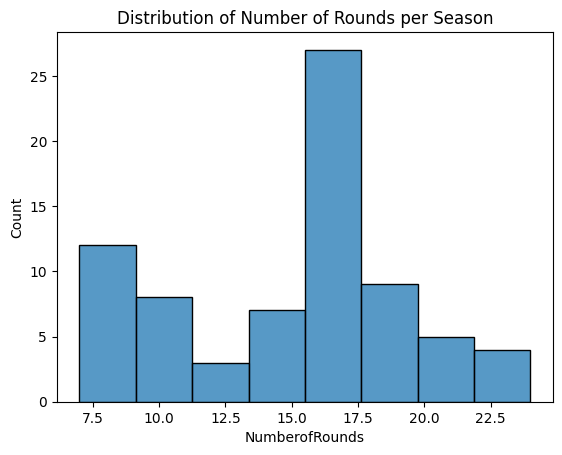

In [110]:
# Create column chart to show distribution of the number of rounds per season.
sns.histplot(data=df_seasons, x='NumberofRounds').set(title="Distribution of Number of Rounds per Season")

[Text(0.5, 1.0, 'NumberofRounds in season Distribution')]

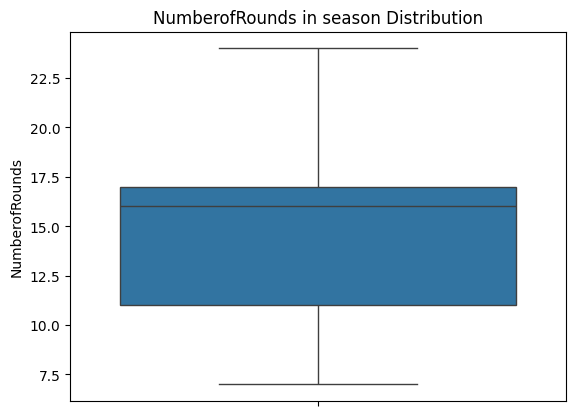

In [111]:
sns.boxplot(y='NumberofRounds', data=df_seasons).set(title='NumberofRounds in season Distribution')

The above charts demonstrates the need to account for variation in the Number of Rounds per Season

In [112]:
# Calculate the driver's total win percentage
df_full['DriverWinPercentage'] = (df_full['DriverCumulativeWins'] / df_full['DriverRacesEntered']) * 100

# Display the updated dataframe info to confirm changes
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3536 entries, 0 to 3552
Data columns (total 31 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3536 non-null   int64         
 1   NumberofRounds                                          3536 non-null   int64         
 2   SeasonStartDate                                         3536 non-null   datetime64[ns]
 3   driverId                                                3536 non-null   int64         
 4   driverRef                                               3536 non-null   object        
 5   DriverFirstName                                         3536 non-null   object        
 6   DriverLastName                                          3536 non-null   object        
 7   DriverNationality                                       3536 non-

In [113]:
# Display the first few rows to confirm changes
df_full.head()


,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,DriverCumulativePodiums,ConstructorCumulativePodiums,DriverCumulativeChampionships,ConstructorCumulativeChampionships,DriverRacesEntered,ConstructorRacesEntered,DriverWonChampionship,ConstructorWonChampionship,DriverAge,DriverWinPercentage
0,2024,24,2024-03-02,1,hamilton,Lewis,Hamilton,British,1985-01-07,131,...,191,272,7,8,332,293,0,0,39,31.024096
1,2024,24,2024-03-02,4,alonso,Fernando,Alonso,Spanish,1981-07-29,117,...,98,9,2,0,380,72,0,0,42,8.421053
2,2024,24,2024-03-02,807,hulkenberg,Nico,Hülkenberg,German,1987-08-19,210,...,0,0,0,0,206,166,0,0,36,0.000000
3,2024,24,2024-03-02,815,perez,Sergio,Pérez,Mexican,1990-01-26,9,...,26,264,0,6,259,370,0,0,34,1.544402
4,2024,24,2024-03-02,817,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,215,...,32,0,0,0,239,0,0,0,34,3.347280


In [114]:
# Repeat for Driver Podium Percentage, Constructor Win Percentage, and Constructor Podium Percentage.

# Calculate the driver's total win percentage
df_full['DriverPodiumPercentage'] = (df_full['DriverCumulativePodiums'] / df_full['DriverRacesEntered']) * 100
df_full['ConstructorWinPercentage'] = (df_full['ConstructorCumulativeWins'] / df_full['ConstructorRacesEntered']) * 100
df_full['ConstructorPodiumPercentage'] = (df_full['ConstructorCumulativePodiums'] / df_full['ConstructorRacesEntered']) * 100

# Display the updated dataframe info to confirm changes
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3536 entries, 0 to 3552
Data columns (total 34 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3536 non-null   int64         
 1   NumberofRounds                                          3536 non-null   int64         
 2   SeasonStartDate                                         3536 non-null   datetime64[ns]
 3   driverId                                                3536 non-null   int64         
 4   driverRef                                               3536 non-null   object        
 5   DriverFirstName                                         3536 non-null   object        
 6   DriverLastName                                          3536 non-null   object        
 7   DriverNationality                                       3536 non-

In [115]:
# Display the first few rows to confirm changes
df_full.head()

,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,ConstructorCumulativeChampionships,DriverRacesEntered,ConstructorRacesEntered,DriverWonChampionship,ConstructorWonChampionship,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage
0,2024,24,2024-03-02,1,hamilton,Lewis,Hamilton,British,1985-01-07,131,...,8,332,293,0,0,39,31.024096,57.530120,39.590444,92.832765
1,2024,24,2024-03-02,4,alonso,Fernando,Alonso,Spanish,1981-07-29,117,...,0,380,72,0,0,42,8.421053,25.789474,0.000000,12.500000
2,2024,24,2024-03-02,807,hulkenberg,Nico,Hülkenberg,German,1987-08-19,210,...,0,206,166,0,0,36,0.000000,0.000000,0.000000,0.000000
3,2024,24,2024-03-02,815,perez,Sergio,Pérez,Mexican,1990-01-26,9,...,6,259,370,0,0,34,1.544402,10.038610,30.540541,71.351351
4,2024,24,2024-03-02,817,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,215,...,0,239,0,0,0,34,3.347280,13.389121,NaN,NaN


The Driver and Constructor Previous Season values will also need converting to % win and podium rates. This will be achieved by repurposing the previously created seasons dataframe to get the number of rounds and calculating the win and podium percentages.

In [116]:
# Add a columns to df_seasons for season year +1, to be merged back into main data frame
df_seasons['Seasonplus1'] = df_seasons['Season'] + 1

# Display first few rows to confirm changes
df_seasons.head()

,Season,NumberofRounds,Seasonplus1
0,2024,24,2025
25,2023,22,2024
47,2022,22,2023
69,2021,22,2022
90,2020,17,2021


In [117]:
# Merge the previous season's number of rounds into the main dataframe
df_full = df_full.merge(df_seasons[['Seasonplus1', 'NumberofRounds']], left_on='Season', right_on='Seasonplus1', suffixes=('', '_PreviousSeason'))

# Display first few rows to confirm changes
df_full.head()


,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,ConstructorRacesEntered,DriverWonChampionship,ConstructorWonChampionship,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,Seasonplus1,NumberofRounds_PreviousSeason
0,2024,24,2024-03-02,1,hamilton,Lewis,Hamilton,British,1985-01-07,131,...,293,0,0,39,31.024096,57.530120,39.590444,92.832765,2024,22
1,2024,24,2024-03-02,4,alonso,Fernando,Alonso,Spanish,1981-07-29,117,...,72,0,0,42,8.421053,25.789474,0.000000,12.500000,2024,22
2,2024,24,2024-03-02,807,hulkenberg,Nico,Hülkenberg,German,1987-08-19,210,...,166,0,0,36,0.000000,0.000000,0.000000,0.000000,2024,22
3,2024,24,2024-03-02,815,perez,Sergio,Pérez,Mexican,1990-01-26,9,...,370,0,0,34,1.544402,10.038610,30.540541,71.351351,2024,22
4,2024,24,2024-03-02,817,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,215,...,0,0,0,34,3.347280,13.389121,NaN,NaN,2024,22


In [118]:
# Display the updated dataframe info to confirm changes, expected to drop 1950 season as no previous season
df_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 36 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3454 non-null   int64         
 1   NumberofRounds                                          3454 non-null   int64         
 2   SeasonStartDate                                         3454 non-null   datetime64[ns]
 3   driverId                                                3454 non-null   int64         
 4   driverRef                                               3454 non-null   object        
 5   DriverFirstName                                         3454 non-null   object        
 6   DriverLastName                                          3454 non-null   object        
 7   DriverNationality                                       3454

In [119]:
# Display the last few rows, after sorting by Season, descending, to check that 1950 has been dropped and last value in 'Season' is now 1951.
df_full = df_full.sort_values(by='Season', ascending=False)
df_full.tail()

,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,ConstructorRacesEntered,DriverWonChampionship,ConstructorWonChampionship,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,Seasonplus1,NumberofRounds_PreviousSeason
3417,1951,8,1951-05-27,700,scarborough,Carl,Scarborough,American,1914-07-03,113,...,1,0,0,36,NaN,NaN,0.0,0.0,1951,7
3418,1951,8,1951-05-27,704,cabantous,Yves,Cabantous,French,1904-10-08,154,...,6,0,0,46,0.0,0.0,0.0,0.0,1951,7
3419,1951,8,1951-05-27,708,duncan_hamilton,Duncan,Hamilton,British,1920-04-30,154,...,6,0,0,31,NaN,NaN,0.0,0.0,1951,7
3452,1951,8,1951-05-27,782,jover,Juan,Jover,Spanish,1903-11-23,105,...,7,0,0,47,NaN,NaN,0.0,0.0,1951,7
3453,1951,8,1951-05-27,783,grignard,Georges,Grignard,French,1905-07-25,154,...,6,0,0,45,NaN,NaN,0.0,0.0,1951,7


In [120]:
# Drop column Seasonplus1 from df_full as it is no longer needed
df_full = df_full.drop(columns=['Seasonplus1'])

# Display first few rows to confirm changes
df_full.head()

,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,DriverRacesEntered,ConstructorRacesEntered,DriverWonChampionship,ConstructorWonChampionship,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,NumberofRounds_PreviousSeason
0,2024,24,2024-03-02,1,hamilton,Lewis,Hamilton,British,1985-01-07,131,...,332,293,0,0,39,31.024096,57.530120,39.590444,92.832765,22
1,2024,24,2024-03-02,4,alonso,Fernando,Alonso,Spanish,1981-07-29,117,...,380,72,0,0,42,8.421053,25.789474,0.000000,12.500000,22
2,2024,24,2024-03-02,807,hulkenberg,Nico,Hülkenberg,German,1987-08-19,210,...,206,166,0,0,36,0.000000,0.000000,0.000000,0.000000,22
3,2024,24,2024-03-02,815,perez,Sergio,Pérez,Mexican,1990-01-26,9,...,259,370,0,0,34,1.544402,10.038610,30.540541,71.351351,22
5,2024,24,2024-03-02,822,bottas,Valtteri,Bottas,Finnish,1989-08-28,15,...,223,395,0,0,34,4.484305,30.044843,0.000000,2.531646,22


A Constructor Podium % of over 100% is possible due to constructors entered more than one car per race

In [121]:
# Calulate the win and podium percentages for the previous season
df_full['DriverWinPercentage_PreviousSeason'] = (df_full['DriverPreviousSeasonWins'] / df_full['NumberofRounds_PreviousSeason'])*100
df_full['DriverPodiumPercentage_PreviousSeason'] = (df_full['DriverPreviousSeasonPodiums'] / df_full['NumberofRounds_PreviousSeason'])*100
df_full['ConstructorWinPercentage_PreviousSeason'] = (df_full['ConstructorPreviousSeasonWins'] / df_full['NumberofRounds_PreviousSeason'])*100
df_full['ConstructorPodiumPercentage_PreviousSeason'] = (df_full['ConstructorPreviousSeasonPodiums'] / df_full['NumberofRounds_PreviousSeason'])*100

# Display the first few rows to confirm changes, a few extra rows so aa driver with previous season wins is included.
df_full.head(10)

# A ConstructorPodiumPercentage_PreviuosSeason can be expected in certain cases, to be over 100% due to constructors entering more than one car per race

,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,NumberofRounds_PreviousSeason,DriverWinPercentage_PreviousSeason,DriverPodiumPercentage_PreviousSeason,ConstructorWinPercentage_PreviousSeason,ConstructorPodiumPercentage_PreviousSeason
0,2024,24,2024-03-02,1,hamilton,Lewis,Hamilton,British,1985-01-07,131,...,39,31.024096,57.530120,39.590444,92.832765,22,0.000000,27.272727,0.000000,36.363636
1,2024,24,2024-03-02,4,alonso,Fernando,Alonso,Spanish,1981-07-29,117,...,42,8.421053,25.789474,0.000000,12.500000,22,0.000000,36.363636,0.000000,36.363636
2,2024,24,2024-03-02,807,hulkenberg,Nico,Hülkenberg,German,1987-08-19,210,...,36,0.000000,0.000000,0.000000,0.000000,22,0.000000,0.000000,0.000000,0.000000
3,2024,24,2024-03-02,815,perez,Sergio,Pérez,Mexican,1990-01-26,9,...,34,1.544402,10.038610,30.540541,71.351351,22,9.090909,40.909091,95.454545,136.363636
5,2024,24,2024-03-02,822,bottas,Valtteri,Bottas,Finnish,1989-08-28,15,...,34,4.484305,30.044843,0.000000,2.531646,22,0.000000,0.000000,0.000000,0.000000
4,2024,24,2024-03-02,817,ricciardo,Daniel,Ricciardo,Australian,1989-07-01,215,...,34,3.347280,13.389121,NaN,NaN,22,0.000000,0.000000,0.000000,0.000000
6,2024,24,2024-03-02,825,kevin_magnussen,Kevin,Magnussen,Danish,1992-10-05,210,...,31,0.000000,0.609756,0.000000,0.000000,22,0.000000,0.000000,0.000000,0.000000
21,2024,24,2024-03-02,860,bearman,Oliver,Bearman,British,2005-05-08,6,...,18,NaN,NaN,20.260223,67.379182,22,0.000000,0.000000,4.545455,40.909091
20,2024,24,2024-03-02,859,lawson,Liam,Lawson,New Zealander,2002-02-11,215,...,22,0.000000,0.000000,NaN,NaN,22,0.000000,0.000000,0.000000,0.000000
11,2024,24,2024-03-02,842,gasly,Pierre,Gasly,French,1996-02-07,214,...,28,0.769231,2.307692,1.515152,6.060606,22,0.000000,4.545455,0.000000,9.090909


In [122]:
# Display the updated dataframe info to confirm changes
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 0 to 3453
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3454 non-null   int64         
 1   NumberofRounds                                          3454 non-null   int64         
 2   SeasonStartDate                                         3454 non-null   datetime64[ns]
 3   driverId                                                3454 non-null   int64         
 4   driverRef                                               3454 non-null   object        
 5   DriverFirstName                                         3454 non-null   object        
 6   DriverLastName                                          3454 non-null   object        
 7   DriverNationality                                       3454 non-

Columns DriverWinPercentage, DriverPodiumPercentage, ConstructorWinPercentage, ConstructorPodiumPercentage contain values 'NaN' where driver/constructor first appears, so we need to replace these values with 0s.

In [123]:
# Average postition columns to change blanks to 0s
columns_to_process = [
    'DriverWinPercentage',
    'DriverPodiumPercentage',
    'ConstructorWinPercentage',
    'ConstructorPodiumPercentage'
]

# Replace blanks with 0s
for column in columns_to_process:
    df_full[column] = df_full[column].fillna(0)

# Display the updated dataframe info to confirm changes
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 0 to 3453
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3454 non-null   int64         
 1   NumberofRounds                                          3454 non-null   int64         
 2   SeasonStartDate                                         3454 non-null   datetime64[ns]
 3   driverId                                                3454 non-null   int64         
 4   driverRef                                               3454 non-null   object        
 5   DriverFirstName                                         3454 non-null   object        
 6   DriverLastName                                          3454 non-null   object        
 7   DriverNationality                                       3454 non-

Columns:
[PreviousSeasonDriverChampion,
PreviousSeasonConstructorChampion,
DriverWonChampionship,
ConstructorWonChampionship]
Need to be boolean type as they are 1s or 0s to denote if driver/constructor won championship previous or current season. DriverWonChampionship will be the value that is determined in the logistic regression model.
Columns:
[Season, driverId, constructorid] are catagorical and will need converting to object.

In [124]:
# Convert specified columns to boolean type
columns_to_convert = [
    'PreviousSeasonDriverChampion',
    'PreviousSeasonConstructorChampion',
    'DriverWonChampionship',
    'ConstructorWonChampionship'
]

for column in columns_to_convert:
    df_full[column] = df_full[column].astype(bool)

# Display the updated dataframe info to confirm changes
df_full.info()

# Display the first few rows to confirm changes
df_full.head()


<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 0 to 3453
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3454 non-null   int64         
 1   NumberofRounds                                          3454 non-null   int64         
 2   SeasonStartDate                                         3454 non-null   datetime64[ns]
 3   driverId                                                3454 non-null   int64         
 4   driverRef                                               3454 non-null   object        
 5   DriverFirstName                                         3454 non-null   object        
 6   DriverLastName                                          3454 non-null   object        
 7   DriverNationality                                       3454 non-

,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,NumberofRounds_PreviousSeason,DriverWinPercentage_PreviousSeason,DriverPodiumPercentage_PreviousSeason,ConstructorWinPercentage_PreviousSeason,ConstructorPodiumPercentage_PreviousSeason
0,2024,24,2024-03-02,1,hamilton,Lewis,Hamilton,British,1985-01-07,131,...,39,31.024096,57.530120,39.590444,92.832765,22,0.000000,27.272727,0.000000,36.363636
1,2024,24,2024-03-02,4,alonso,Fernando,Alonso,Spanish,1981-07-29,117,...,42,8.421053,25.789474,0.000000,12.500000,22,0.000000,36.363636,0.000000,36.363636
2,2024,24,2024-03-02,807,hulkenberg,Nico,Hülkenberg,German,1987-08-19,210,...,36,0.000000,0.000000,0.000000,0.000000,22,0.000000,0.000000,0.000000,0.000000
3,2024,24,2024-03-02,815,perez,Sergio,Pérez,Mexican,1990-01-26,9,...,34,1.544402,10.038610,30.540541,71.351351,22,9.090909,40.909091,95.454545,136.363636
5,2024,24,2024-03-02,822,bottas,Valtteri,Bottas,Finnish,1989-08-28,15,...,34,4.484305,30.044843,0.000000,2.531646,22,0.000000,0.000000,0.000000,0.000000


In [125]:
# Convert specified columns to object type
columns_to_convert = [
    'Season',
    'driverId',
    'constructorId'
]

for column in columns_to_convert:
    df_full[column] = df_full[column].astype(object)

# Display the updated dataframe info to confirm changes
df_full.info()

# Display the first few rows to confirm changes
df_full.head()

<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 0 to 3453
Data columns (total 39 columns):
 #   Column                                                  Non-Null Count  Dtype         
---  ------                                                  --------------  -----         
 0   Season                                                  3454 non-null   object        
 1   NumberofRounds                                          3454 non-null   int64         
 2   SeasonStartDate                                         3454 non-null   datetime64[ns]
 3   driverId                                                3454 non-null   object        
 4   driverRef                                               3454 non-null   object        
 5   DriverFirstName                                         3454 non-null   object        
 6   DriverLastName                                          3454 non-null   object        
 7   DriverNationality                                       3454 non-

,Season,NumberofRounds,SeasonStartDate,driverId,driverRef,DriverFirstName,DriverLastName,DriverNationality,DriverDOB,constructorId,...,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,NumberofRounds_PreviousSeason,DriverWinPercentage_PreviousSeason,DriverPodiumPercentage_PreviousSeason,ConstructorWinPercentage_PreviousSeason,ConstructorPodiumPercentage_PreviousSeason
0,2024,24,2024-03-02,1,hamilton,Lewis,Hamilton,British,1985-01-07,131,...,39,31.024096,57.530120,39.590444,92.832765,22,0.000000,27.272727,0.000000,36.363636
1,2024,24,2024-03-02,4,alonso,Fernando,Alonso,Spanish,1981-07-29,117,...,42,8.421053,25.789474,0.000000,12.500000,22,0.000000,36.363636,0.000000,36.363636
2,2024,24,2024-03-02,807,hulkenberg,Nico,Hülkenberg,German,1987-08-19,210,...,36,0.000000,0.000000,0.000000,0.000000,22,0.000000,0.000000,0.000000,0.000000
3,2024,24,2024-03-02,815,perez,Sergio,Pérez,Mexican,1990-01-26,9,...,34,1.544402,10.038610,30.540541,71.351351,22,9.090909,40.909091,95.454545,136.363636
5,2024,24,2024-03-02,822,bottas,Valtteri,Bottas,Finnish,1989-08-28,15,...,34,4.484305,30.044843,0.000000,2.531646,22,0.000000,0.000000,0.000000,0.000000


The descriptive columns and win/podium columns that have has percentage amounts added, can now be dropped to simplify the dataframe.

In [126]:
# shape of dataframe before drops
df_full.shape


(3454, 39)

In [127]:
# drop specific columns
columns_to_drop = [
    'NumberofRounds',
    'SeasonStartDate',
    'driverRef',
    'DriverFirstName',
    'DriverLastName',
    'DriverNationality',
    'DriverDOB',
    'Constructor',
    'DriverPreviousSeasonWins',
    'DriverPreviousSeasonPodiums',
    'ConstructorPreviousSeasonWins',
    'ConstructorPreviousSeasonPodiums',
    'DriverCumulativeWins',
    'DriverCumulativePodiums',
    'ConstructorCumulativeWins',
    'ConstructorCumulativePodiums',
    'NumberofRounds_PreviousSeason'
]

for columns in columns_to_drop:
    df_full = df_full.drop(columns=columns)

# Display the updated dataframe info to confirm changes
df_full.info()

# Display the first few rows to confirm changes
df_full.head()

#Display shape of dateframe compae to ebfore to confirm changes
df_full.shape


<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 0 to 3453
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Season                                                  3454 non-null   object 
 1   driverId                                                3454 non-null   object 
 2   constructorId                                           3454 non-null   object 
 3   PreviousSeasonDriverChampion                            3454 non-null   bool   
 4   PreviousSeasonConstructorChampion                       3454 non-null   bool   
 5   Driver_Ave_Position_Last5_AvgPositionLast5Seasons       3454 non-null   float64
 6   Constructor_Ave_Position_Last5_AvgPositionLast5Seasons  3454 non-null   float64
 7   DriverCumulativeChampionships                           3454 non-null   int64  
 8   ConstructorCumulativeChampionships         

(3454, 22)

In [128]:
# check for duplicates
sum(df_full.duplicated())

0

In [129]:
# check no null values remain
df_full.notnull().sum()

,0
Season,3454
driverId,3454
constructorId,3454
PreviousSeasonDriverChampion,3454
PreviousSeasonConstructorChampion,3454
Driver_Ave_Position_Last5_AvgPositionLast5Seasons,3454
Constructor_Ave_Position_Last5_AvgPositionLast5Seasons,3454
DriverCumulativeChampionships,3454
ConstructorCumulativeChampionships,3454
DriverRacesEntered,3454


#EDA

### Exploritory Data Analysis to assess and get an overview of the final dataframe while checking for outliers, anomolies, and trends within the dataset.

[]

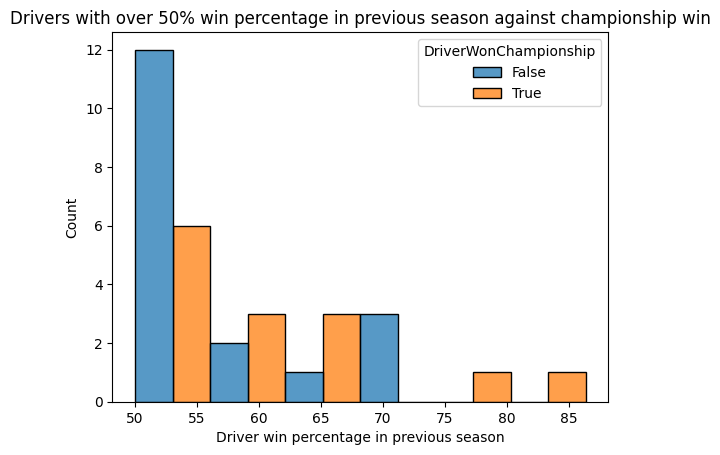

In [130]:
# EDA on stat expected to produce many driver's world champions to check dataframe is approximately as expected

# Filter the dataframe where DriverPreviousSeasonWinPercentage is greater than 50
df_filtered = df_full[df_full['DriverWinPercentage_PreviousSeason'] >= 50]


# Create a column plot using sns.histplot
dwp50 = sns.histplot(data=df_filtered, x='DriverWinPercentage_PreviousSeason', hue='DriverWonChampionship', multiple="dodge")
dwp50.set(title='Drivers with over 50% win percentage in previous season against championship win')
dwp50.set_xlabel('Driver win percentage in previous season')

# Show the plot
dwp50.plot()


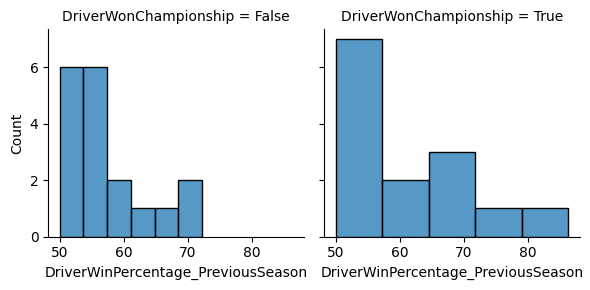

In [131]:
# side by side of same stat
dwp = sns.FacetGrid(data=df_filtered, col='DriverWonChampionship', col_wrap=2)
dwp.map(sns.histplot, 'DriverWinPercentage_PreviousSeason')



[Text(0.5, 1.0, 'Driver Win Percentage Distribution')]

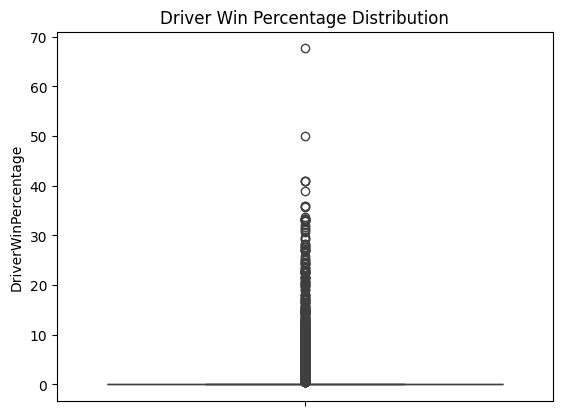

In [132]:
# checking distribution of Driver Win percentage for outliers, no driver can achieve over 100% win rate.
sns.boxplot(y= 'DriverWinPercentage', data=df_full).set(title='Driver Win Percentage Distribution')

[Text(0.5, 1.0, 'Driver Podium Percentage Distribution')]

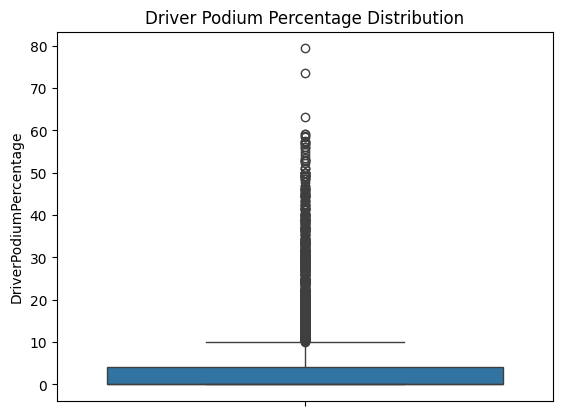

In [133]:
# checking distribution of Driver Podium percentage for outliers, no driver can achieve over 100% Podium rate.
sns.boxplot(y= 'DriverPodiumPercentage', data=df_full).set(title='Driver Podium Percentage Distribution')

[Text(0.5, 1.0, 'Constructor Win Percentage Distribution')]

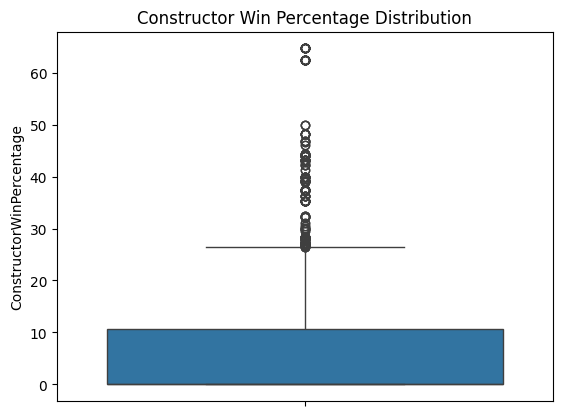

In [134]:
# checking distribution of Constructor Win percentage for outliers, no constructor can achieve over 100% win rate.
sns.boxplot(y= 'ConstructorWinPercentage', data=df_full).set(title='Constructor Win Percentage Distribution')

[Text(0.5, 1.0, 'Constructor Podium Percentage Distribution')]

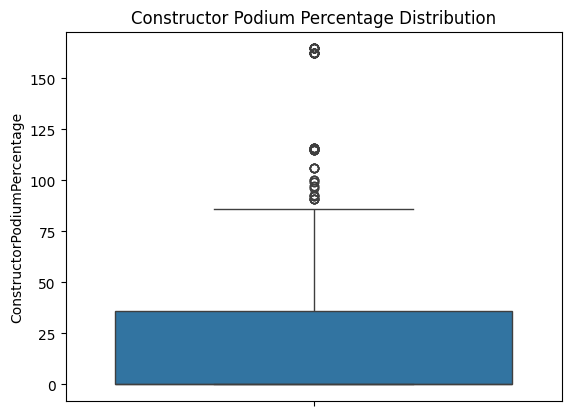

In [135]:
# checking distribution of Constructor Podium percentage for outliers, constructor can achieve over 100% podium rate but it should be rare.
sns.boxplot(y= 'ConstructorPodiumPercentage', data=df_full).set(title='Constructor Podium Percentage Distribution')

All boxplots do show some outliers but are within expected range, so no need to remove any data.



[Text(0.5, 1.0, 'Driver Age Distribution by championship won')]

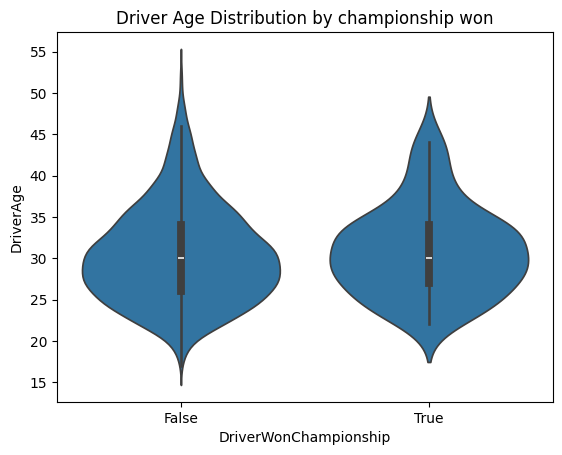

In [136]:
# checking distribution of Driver Age plotted against if driver won championship
sns.violinplot(y= 'DriverAge',x= 'DriverWonChampionship', data=df_full).set(title='Driver Age Distribution by championship won')

[Text(0.5, 1.0, 'Driver Age vs Races Entered')]

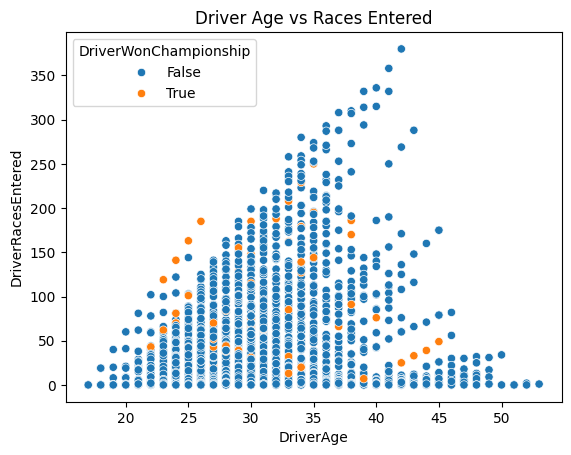

In [137]:
# Looking for any obvious pattern in driver winning championship with Driver Age and Driver Races Entered
sns.scatterplot(x= 'DriverAge', y= 'DriverRacesEntered', data=df_full, hue='DriverWonChampionship').set(title='Driver Age vs Races Entered')

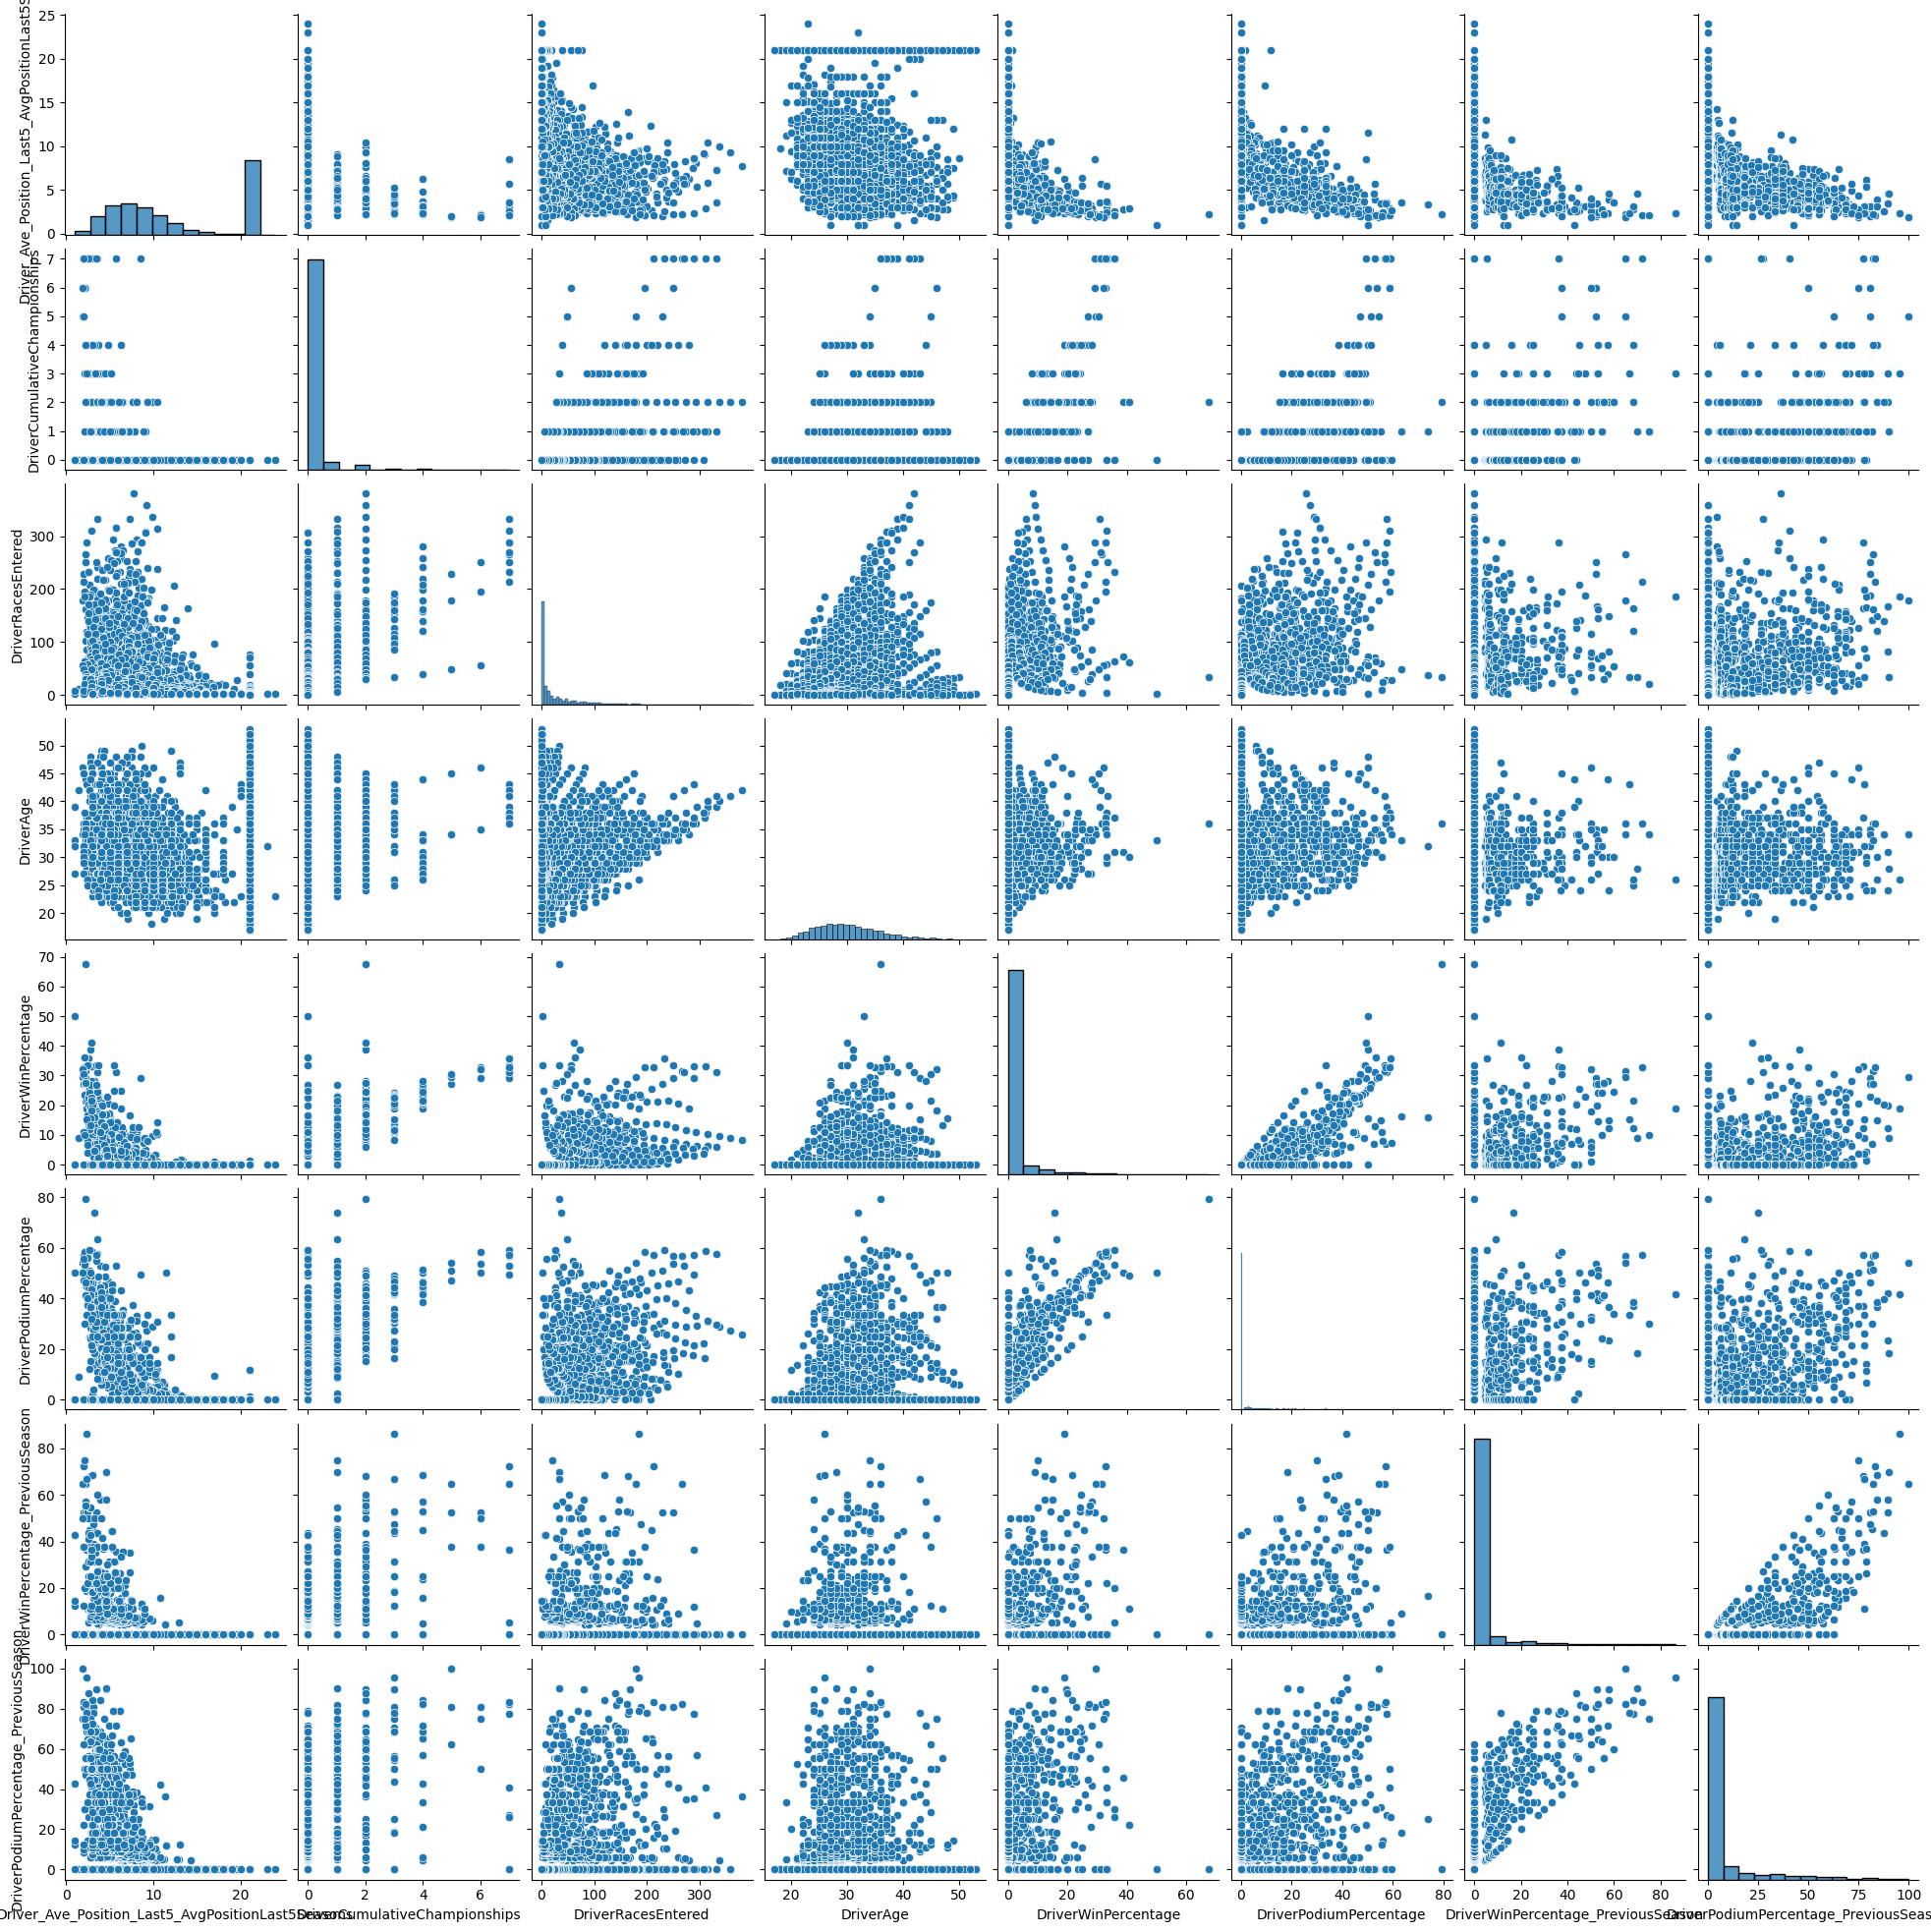

In [138]:
# plots of all driver related fields
sns.pairplot(df_full[['Driver_Ave_Position_Last5_AvgPositionLast5Seasons','DriverCumulativeChampionships','DriverRacesEntered','DriverAge','DriverWinPercentage','DriverPodiumPercentage','DriverWinPercentage_PreviousSeason','DriverPodiumPercentage_PreviousSeason']])

The relationships observered are mostly as expected in highly related statistics, such as win and podium percentages, cumulative wins and podiums against previous season win and podium percentages, and DriverAge vs DriverRacesEntered.

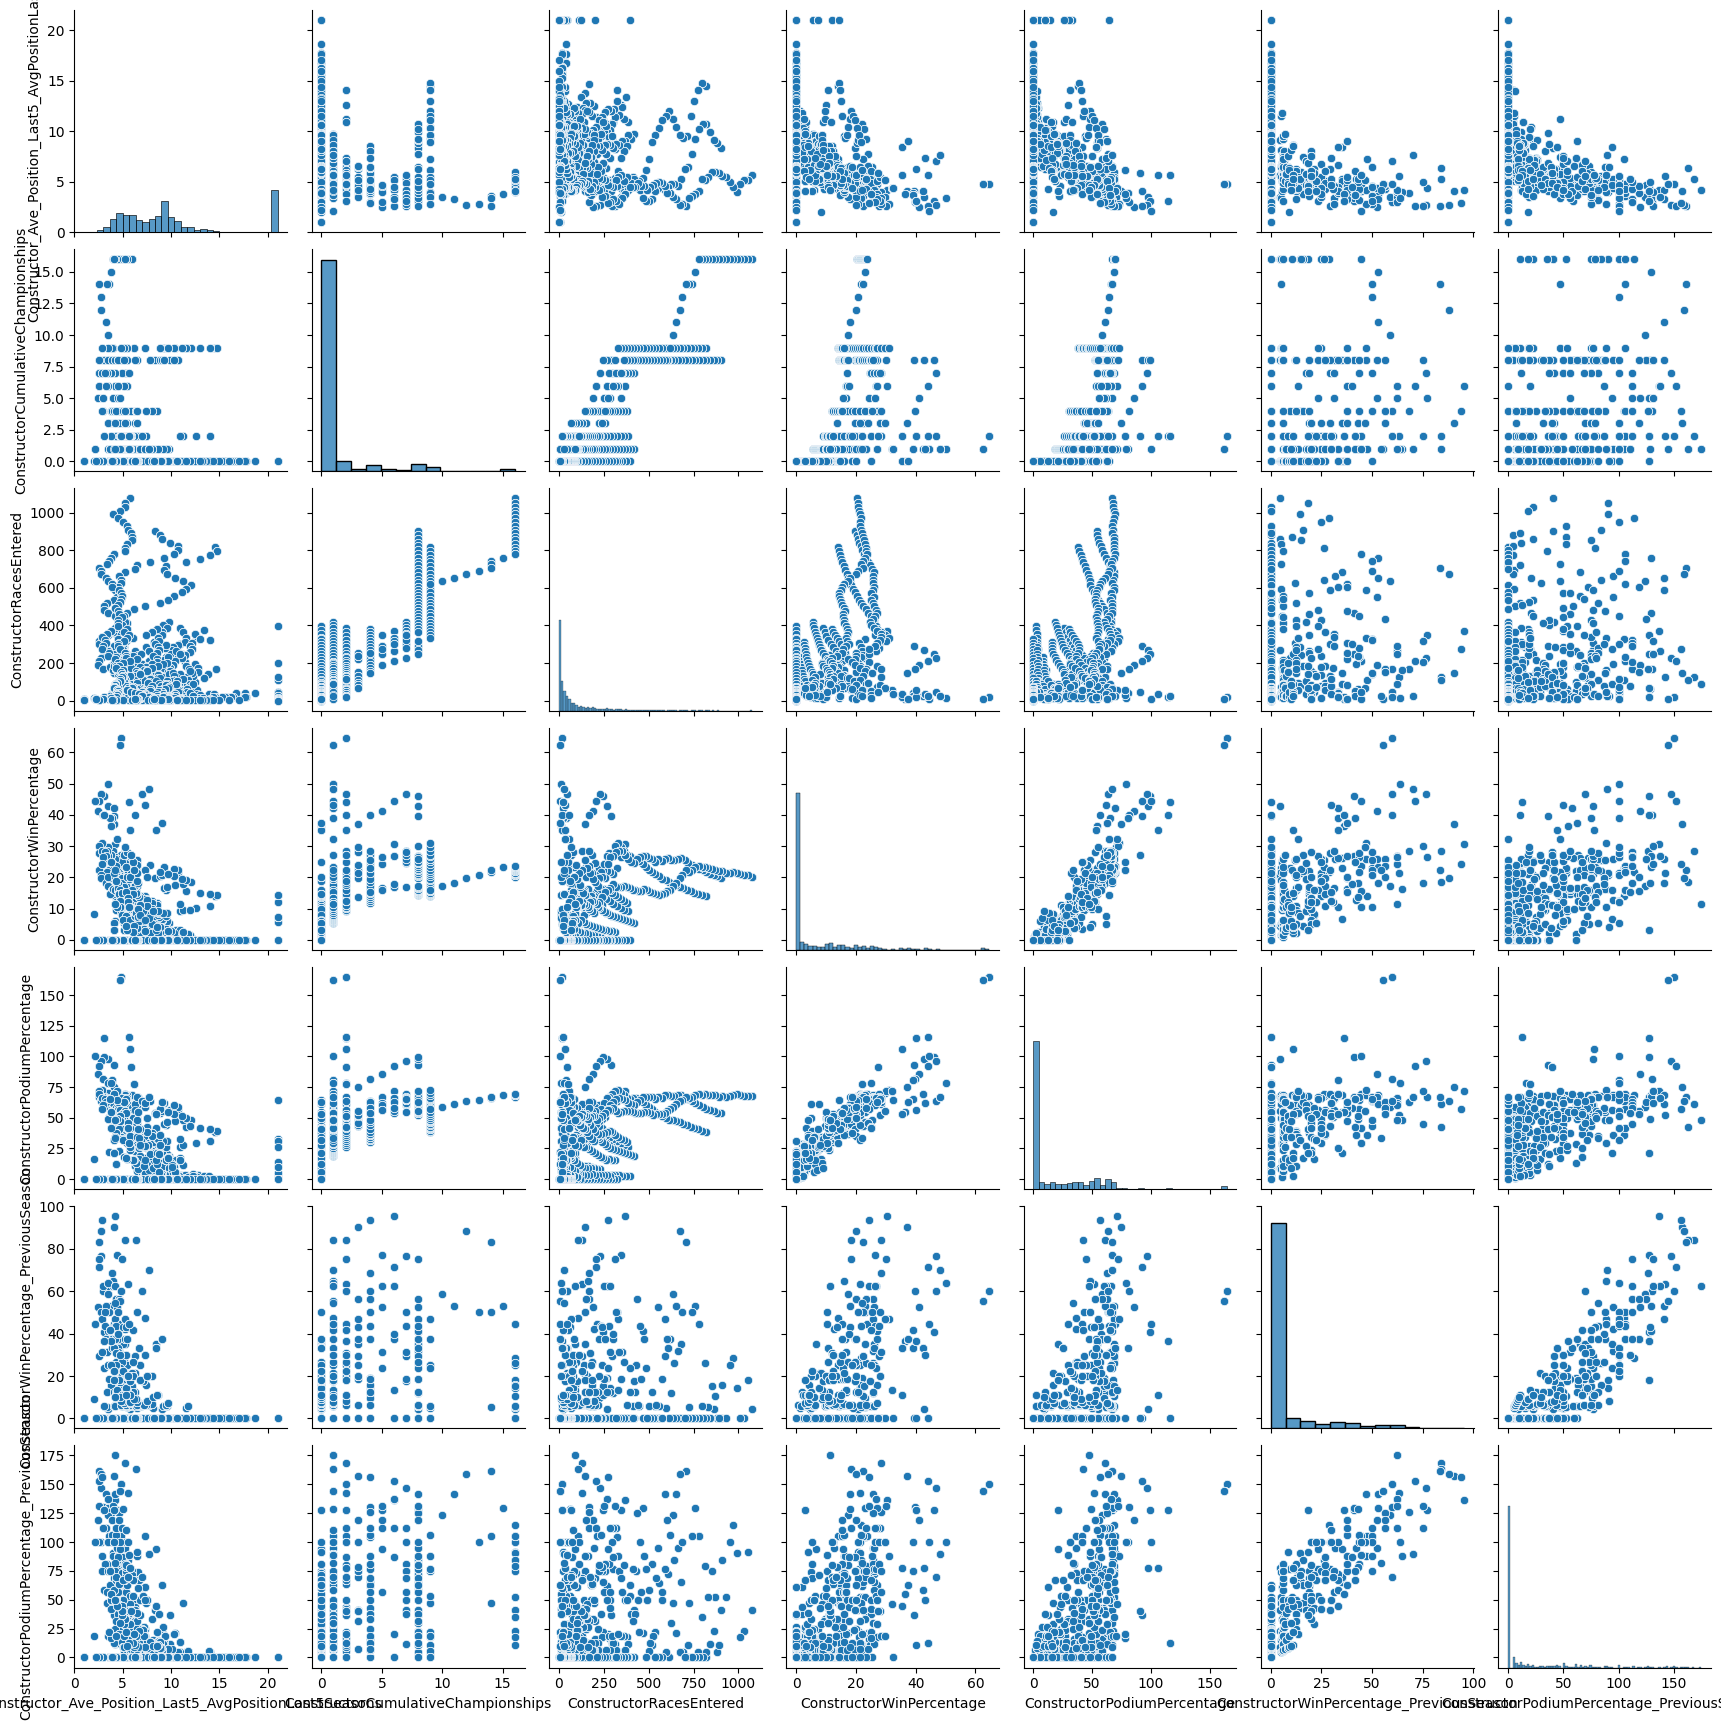

In [139]:
# plots of all constructor related fields
sns.pairplot(df_full[['Constructor_Ave_Position_Last5_AvgPositionLast5Seasons','ConstructorCumulativeChampionships','ConstructorRacesEntered','ConstructorWinPercentage','ConstructorPodiumPercentage','ConstructorWinPercentage_PreviousSeason','ConstructorPodiumPercentage_PreviousSeason']])

The relationships observered are again mostly as expected in highly related statistics, such as win and podium percentages and cumulative wins and podiums against previous season win and podium percentages.
One interesting plot is Constructor_Ave_Position_Last5_AvgPositionLast5Season (Constructor form indicator) vs ConstructorRacesEntered, which shows the ebb and flow of a constructors form over years of racing, this could be due to a number of factors from driver quality, staff quality, funding, or F1 regulations, among others.

[Text(0.5, 1.0, 'Constructor Form over races entered')]

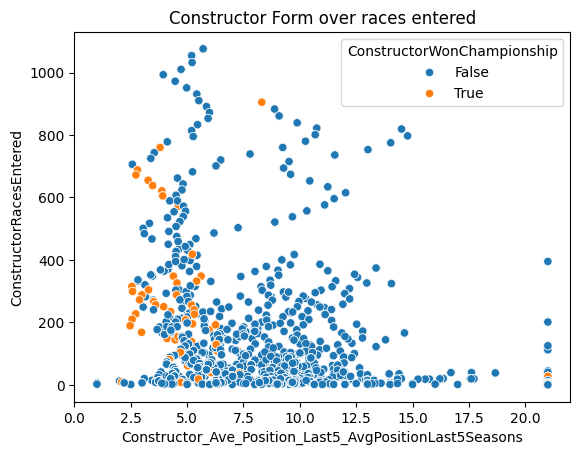

In [140]:
# clearer representation of constructor form vs constructor races entered
sns.scatterplot(x= 'Constructor_Ave_Position_Last5_AvgPositionLast5Seasons', y= 'ConstructorRacesEntered', data=df_full, hue='ConstructorWonChampionship').set(title='Constructor Form over races entered')

### Correlation Matrix

In [141]:
# to look at correlation numeric only columns will be created as a subset
df_subset = df_full.select_dtypes(include=['float64', 'int64'])

df_subset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Driver_Ave_Position_Last5_AvgPositionLast5Seasons       3454 non-null   float64
 1   Constructor_Ave_Position_Last5_AvgPositionLast5Seasons  3454 non-null   float64
 2   DriverCumulativeChampionships                           3454 non-null   int64  
 3   ConstructorCumulativeChampionships                      3454 non-null   int64  
 4   DriverRacesEntered                                      3454 non-null   int64  
 5   ConstructorRacesEntered                                 3454 non-null   int64  
 6   DriverAge                                               3454 non-null   int64  
 7   DriverWinPercentage                                     3454 non-null   float64
 8   DriverPodiumPercentage                     

In [142]:
df_subset.corr()

,Driver_Ave_Position_Last5_AvgPositionLast5Seasons,Constructor_Ave_Position_Last5_AvgPositionLast5Seasons,DriverCumulativeChampionships,ConstructorCumulativeChampionships,DriverRacesEntered,ConstructorRacesEntered,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,DriverWinPercentage_PreviousSeason,DriverPodiumPercentage_PreviousSeason,ConstructorWinPercentage_PreviousSeason,ConstructorPodiumPercentage_PreviousSeason
Driver_Ave_Position_Last5_AvgPositionLast5Seasons,1.000000,0.229334,-0.271021,-0.216944,-0.494817,-0.194290,-0.198206,-0.380595,-0.519208,-0.165726,-0.189724,-0.330394,-0.471785,-0.202215,-0.245666
Constructor_Ave_Position_Last5_AvgPositionLast5Seasons,0.229334,1.000000,-0.112892,-0.296861,-0.138074,-0.292829,-0.033910,-0.120347,-0.165133,-0.413827,-0.459831,-0.193979,-0.259276,-0.362905,-0.445672
DriverCumulativeChampionships,-0.271021,-0.112892,1.000000,0.273582,0.480107,0.211699,0.155015,0.751065,0.636631,0.186569,0.187075,0.527919,0.478660,0.243172,0.248981
ConstructorCumulativeChampionships,-0.216944,-0.296861,0.273582,1.000000,0.398472,0.890620,-0.103242,0.256087,0.288184,0.506071,0.555032,0.255464,0.383282,0.348139,0.445454
DriverRacesEntered,-0.494817,-0.138074,0.480107,0.398472,1.000000,0.420609,0.178834,0.451512,0.569543,0.201650,0.234379,0.289462,0.415434,0.229733,0.272888
ConstructorRacesEntered,-0.194290,-0.292829,0.211699,0.890620,0.420609,1.000000,-0.186648,0.191368,0.226077,0.366575,0.439008,0.188782,0.302493,0.211591,0.305582
DriverAge,-0.198206,-0.033910,0.155015,-0.103242,0.178834,-0.186648,1.000000,0.149173,0.209046,-0.059956,-0.068724,0.034445,0.040984,-0.000267,-0.015108
DriverWinPercentage,-0.380595,-0.120347,0.751065,0.256087,0.451512,0.191368,0.149173,1.000000,0.823865,0.194733,0.190138,0.542078,0.513713,0.238847,0.247876
DriverPodiumPercentage,-0.519208,-0.165133,0.636631,0.288184,0.569543,0.226077,0.209046,0.823865,1.000000,0.204568,0.217449,0.505353,0.565340,0.260314,0.287280
ConstructorWinPercentage,-0.165726,-0.413827,0.186569,0.506071,0.201650,0.366575,-0.059956,0.194733,0.204568,1.000000,0.945181,0.263018,0.315678,0.742114,0.755207


<Axes: >

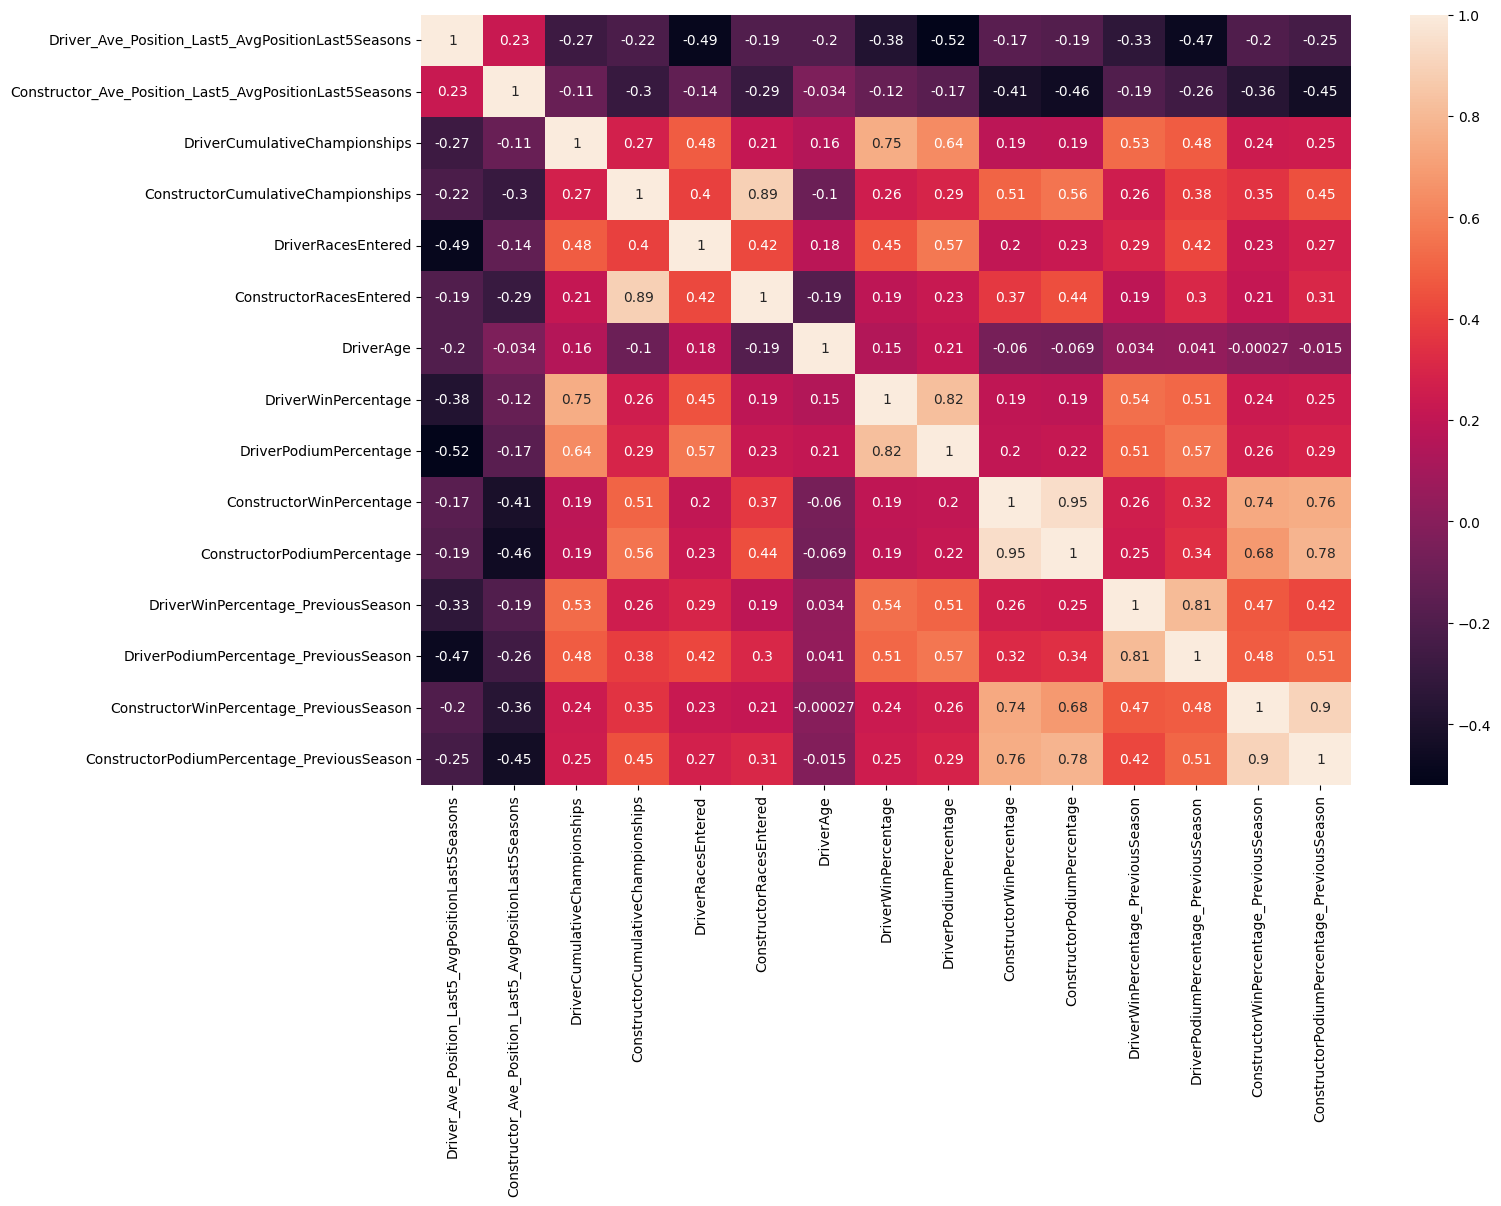

In [143]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_subset.corr(), annot = True)

Strong correlations can be seen where expected with win/podium percentages across both Drivers and Constructors. Negative correlations are expected with Average Position columns, as a lower average position indicates better performance. Conversly a positive correlation between Driver Races Entered and Driver Average Position suggests that a driver moves down the order as they progress in races, however this could be weighted by a few drivers with very long careers who have moved to less successful teams in the latter stages of their career.  

# Logistic Regression

### Creation of Logistic Regression model to determine key predicitve factors of the formula 1 world driver's championship.

In [144]:
df_full.head()

,Season,driverId,constructorId,PreviousSeasonDriverChampion,PreviousSeasonConstructorChampion,Driver_Ave_Position_Last5_AvgPositionLast5Seasons,Constructor_Ave_Position_Last5_AvgPositionLast5Seasons,DriverCumulativeChampionships,ConstructorCumulativeChampionships,DriverRacesEntered,...,ConstructorWonChampionship,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,DriverWinPercentage_PreviousSeason,DriverPodiumPercentage_PreviousSeason,ConstructorWinPercentage_PreviousSeason,ConstructorPodiumPercentage_PreviousSeason
0,2024,1,131,False,False,3.53,4.07,7,8,332,...,False,39,31.024096,57.530120,39.590444,92.832765,0.000000,27.272727,0.000000,36.363636
1,2024,4,117,False,False,7.72,9.85,2,0,380,...,False,42,8.421053,25.789474,0.000000,12.500000,0.000000,36.363636,0.000000,36.363636
2,2024,807,210,False,False,12.36,14.64,0,0,206,...,False,36,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,2024,815,9,False,True,6.24,4.15,0,6,259,...,False,34,1.544402,10.038610,30.540541,71.351351,9.090909,40.909091,95.454545,136.363636
5,2024,822,15,False,False,7.20,21.00,0,0,223,...,False,34,4.484305,30.044843,0.000000,2.531646,0.000000,0.000000,0.000000,0.000000


In [145]:
df_full.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 0 to 3453
Data columns (total 22 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Season                                                  3454 non-null   object 
 1   driverId                                                3454 non-null   object 
 2   constructorId                                           3454 non-null   object 
 3   PreviousSeasonDriverChampion                            3454 non-null   bool   
 4   PreviousSeasonConstructorChampion                       3454 non-null   bool   
 5   Driver_Ave_Position_Last5_AvgPositionLast5Seasons       3454 non-null   float64
 6   Constructor_Ave_Position_Last5_AvgPositionLast5Seasons  3454 non-null   float64
 7   DriverCumulativeChampionships                           3454 non-null   int64  
 8   ConstructorCumulativeChampionships         

In [146]:
# Drop unneeded columns to create dataset ready for logistic regression

columns_to_drop = [
   'driverId',
   'constructorId',
   'ConstructorWonChampionship'
]

for columns in columns_to_drop:
    df_log = df_full.drop(columns=columns_to_drop)

df_log.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3454 entries, 0 to 3453
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Season                                                  3454 non-null   object 
 1   PreviousSeasonDriverChampion                            3454 non-null   bool   
 2   PreviousSeasonConstructorChampion                       3454 non-null   bool   
 3   Driver_Ave_Position_Last5_AvgPositionLast5Seasons       3454 non-null   float64
 4   Constructor_Ave_Position_Last5_AvgPositionLast5Seasons  3454 non-null   float64
 5   DriverCumulativeChampionships                           3454 non-null   int64  
 6   ConstructorCumulativeChampionships                      3454 non-null   int64  
 7   DriverRacesEntered                                      3454 non-null   int64  
 8   ConstructorRacesEntered                    

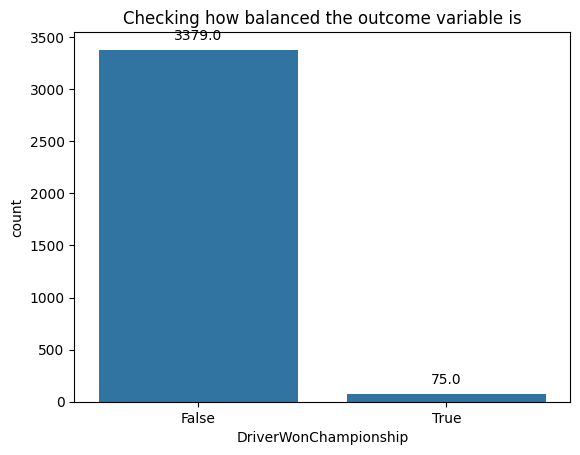

In [147]:
# Is the dataset unbalanced?

g = sns.countplot(data=df_log, x='DriverWonChampionship')
g.set(title='Checking how balanced the outcome variable is')

# The plot below shows that the data is very unblanaced, this would indicate that the dataset is a bad fit for logistic regression.

# Adding data labels
for p in g.patches:
    g.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 10),
               textcoords='offset points')

plt.show()

In [148]:
# dropping rows before current points system in f1
df_log = df_log[(df_log['Season'] >= 2010)]
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 0 to 347
Data columns (total 19 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   Season                                                  357 non-null    object 
 1   PreviousSeasonDriverChampion                            357 non-null    bool   
 2   PreviousSeasonConstructorChampion                       357 non-null    bool   
 3   Driver_Ave_Position_Last5_AvgPositionLast5Seasons       357 non-null    float64
 4   Constructor_Ave_Position_Last5_AvgPositionLast5Seasons  357 non-null    float64
 5   DriverCumulativeChampionships                           357 non-null    int64  
 6   ConstructorCumulativeChampionships                      357 non-null    int64  
 7   DriverRacesEntered                                      357 non-null    int64  
 8   ConstructorRacesEntered                      

In [149]:
df_log = df_log.drop(columns=['Season'])
df_log.info()

<class 'pandas.core.frame.DataFrame'>
Index: 357 entries, 0 to 347
Data columns (total 18 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   PreviousSeasonDriverChampion                            357 non-null    bool   
 1   PreviousSeasonConstructorChampion                       357 non-null    bool   
 2   Driver_Ave_Position_Last5_AvgPositionLast5Seasons       357 non-null    float64
 3   Constructor_Ave_Position_Last5_AvgPositionLast5Seasons  357 non-null    float64
 4   DriverCumulativeChampionships                           357 non-null    int64  
 5   ConstructorCumulativeChampionships                      357 non-null    int64  
 6   DriverRacesEntered                                      357 non-null    int64  
 7   ConstructorRacesEntered                                 357 non-null    int64  
 8   DriverWonChampionship                        

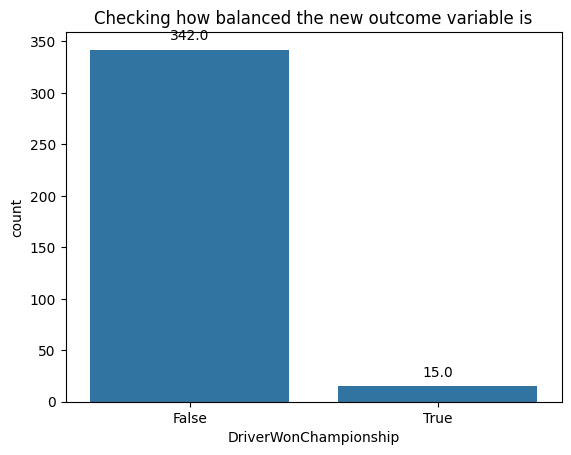

In [150]:
# re-checking dataset balance
g = sns.countplot(data=df_log, x='DriverWonChampionship')
g.set(title='Checking how balanced the new outcome variable is')

# Adding data labels
for p in g.patches:
    g.annotate(f'{p.get_height()}',
               (p.get_x() + p.get_width() / 2., p.get_height()),
               ha='center', va='center',
               xytext=(0, 10),
               textcoords='offset points')

plt.show()

### Split data in train and test datasets

In [151]:
# train test split
from sklearn.model_selection import train_test_split

# We have retained 20% of the data for the test set
# stratify function asks train_test_split function to try and get a balance on Outcome
df_train, df_test = train_test_split(df_log, test_size=0.2, random_state=1234, stratify=df_log['DriverWonChampionship'])
print(df_log.shape)
print(df_train.shape)
print(df_test.shape)

(357, 18)
(285, 18)
(72, 18)


In [152]:
# check the proportion split of outcome variable within the train and test sets
print(df_log['DriverWonChampionship'].value_counts(normalize=True))
print(df_train['DriverWonChampionship'].value_counts(normalize=True))
print(df_test['DriverWonChampionship'].value_counts(normalize=True))

DriverWonChampionship
False    0.957983
True     0.042017
Name: proportion, dtype: float64
DriverWonChampionship
False    0.957895
True     0.042105
Name: proportion, dtype: float64
DriverWonChampionship
False    0.958333
True     0.041667
Name: proportion, dtype: float64


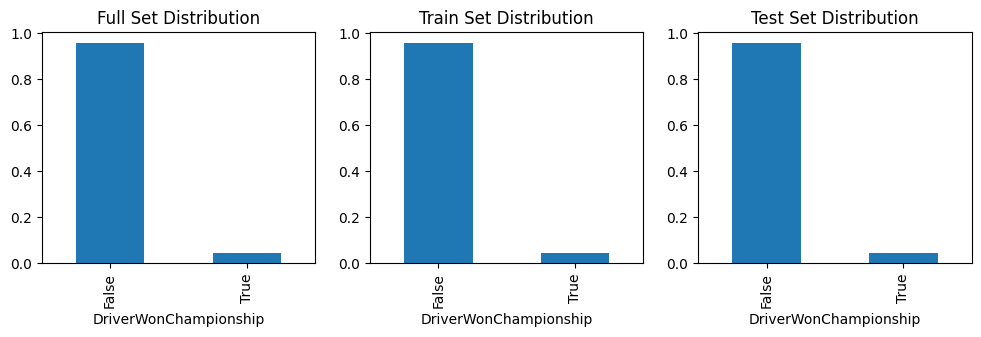

In [153]:
# verify the train test split

fig, axs = plt.subplots(ncols=3, figsize=(12, 3))
df_log['DriverWonChampionship'].value_counts(normalize=True).plot(kind='bar', ax=axs[0])
axs[0].set_title("Full Set Distribution")

df_train['DriverWonChampionship'].value_counts(normalize=True).plot(kind='bar', ax=axs[1])
axs[1].set_title("Train Set Distribution")

df_test['DriverWonChampionship'].value_counts(normalize=True).plot(kind='bar', ax=axs[2])
axs[2].set_title('Test Set Distribution')
plt.show()

The distribution of the outcome is consistant across the datasets so we can proceed.

In [154]:
corr = df_train.corr()
corr

,PreviousSeasonDriverChampion,PreviousSeasonConstructorChampion,Driver_Ave_Position_Last5_AvgPositionLast5Seasons,Constructor_Ave_Position_Last5_AvgPositionLast5Seasons,DriverCumulativeChampionships,ConstructorCumulativeChampionships,DriverRacesEntered,ConstructorRacesEntered,DriverWonChampionship,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,DriverWinPercentage_PreviousSeason,DriverPodiumPercentage_PreviousSeason,ConstructorWinPercentage_PreviousSeason,ConstructorPodiumPercentage_PreviousSeason
PreviousSeasonDriverChampion,1.000000,0.552601,-0.293522,-0.255318,0.482015,0.018353,0.191153,-0.054109,0.652015,0.088385,0.470584,0.417468,0.314736,0.254531,0.835047,0.591473,0.561898,0.465889
PreviousSeasonConstructorChampion,0.552601,1.000000,-0.309079,-0.382584,0.365508,0.011602,0.228229,-0.135656,0.490840,0.167080,0.387842,0.358127,0.520206,0.400574,0.686166,0.637476,0.888308,0.768429
Driver_Ave_Position_Last5_AvgPositionLast5Seasons,-0.293522,-0.309079,1.000000,0.478784,-0.457036,-0.311516,-0.701136,-0.213536,-0.283490,-0.495199,-0.566335,-0.670555,-0.445918,-0.466448,-0.438519,-0.591992,-0.412310,-0.507484
Constructor_Ave_Position_Last5_AvgPositionLast5Seasons,-0.255318,-0.382584,0.478784,1.000000,-0.311829,-0.520760,-0.294703,-0.440898,-0.235499,-0.075937,-0.379152,-0.399715,-0.738669,-0.772866,-0.395692,-0.518188,-0.505781,-0.648785
DriverCumulativeChampionships,0.482015,0.365508,-0.457036,-0.311829,1.000000,0.246529,0.548854,0.091041,0.310565,0.408065,0.946256,0.832269,0.446028,0.402626,0.564314,0.548055,0.370375,0.420588
ConstructorCumulativeChampionships,0.018353,0.011602,-0.311516,-0.520760,0.246529,1.000000,0.244861,0.911977,-0.022591,0.082436,0.334647,0.371785,0.691225,0.776255,0.111392,0.266543,0.137233,0.326775
DriverRacesEntered,0.191153,0.228229,-0.701136,-0.294703,0.548854,0.244861,1.000000,0.143535,0.154412,0.831671,0.595974,0.727756,0.328454,0.335498,0.301749,0.444098,0.276104,0.339541
ConstructorRacesEntered,-0.054109,-0.135656,-0.213536,-0.440898,0.091041,0.911977,0.143535,1.000000,-0.080217,-0.005059,0.163873,0.208799,0.543189,0.642514,-0.001449,0.112382,-0.015289,0.132494
DriverWonChampionship,0.652015,0.490840,-0.283490,-0.235499,0.310565,-0.022591,0.154412,-0.080217,1.000000,0.035804,0.372150,0.348870,0.265352,0.215030,0.687203,0.562960,0.545848,0.475701
DriverAge,0.088385,0.167080,-0.495199,-0.075937,0.408065,0.082436,0.831671,-0.005059,0.035804,1.000000,0.437294,0.549497,0.139511,0.146112,0.155986,0.263027,0.158628,0.185159


<Axes: >

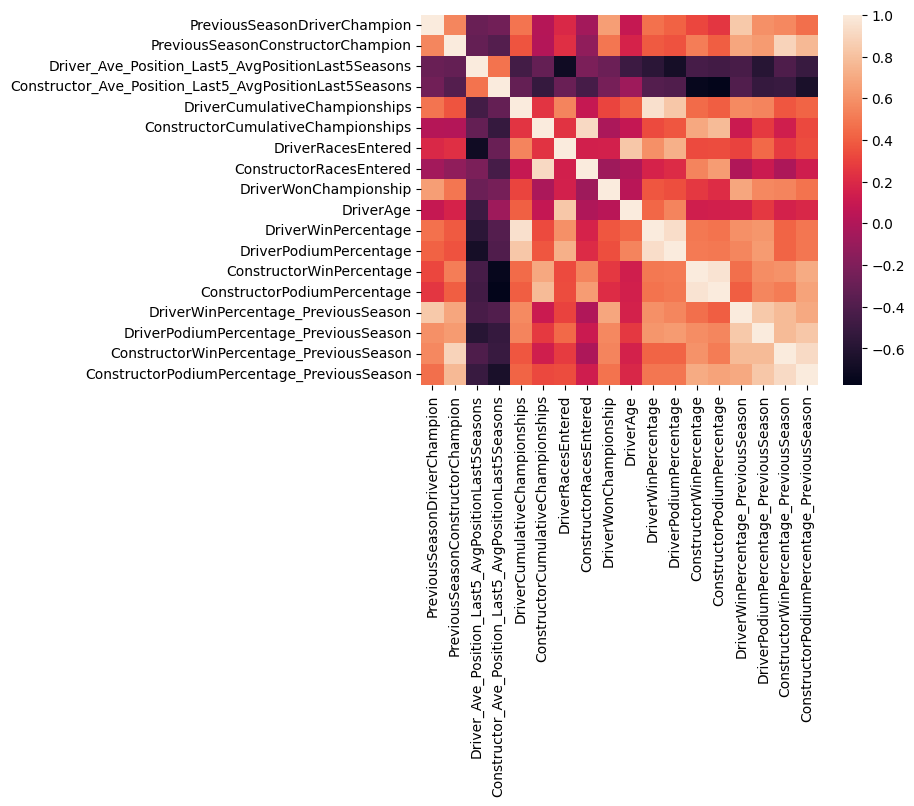

In [155]:
# visualising the correlation matrix
sns.heatmap(corr,
            xticklabels=corr.columns,
         yticklabels=corr.columns)

<Axes: xlabel='DriverWonChampionship', ylabel='Driver_Ave_Position_Last5_AvgPositionLast5Seasons'>

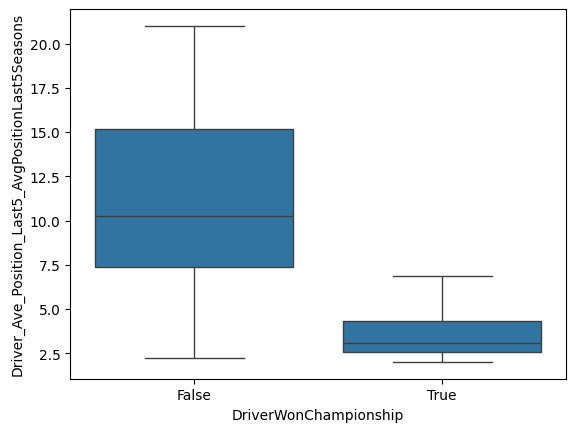

In [156]:
# Checking for outliers in train dataset
sns.boxplot(y="Driver_Ave_Position_Last5_AvgPositionLast5Seasons", x = "DriverWonChampionship", data=df_train)

<Axes: xlabel='DriverWonChampionship', ylabel='Constructor_Ave_Position_Last5_AvgPositionLast5Seasons'>

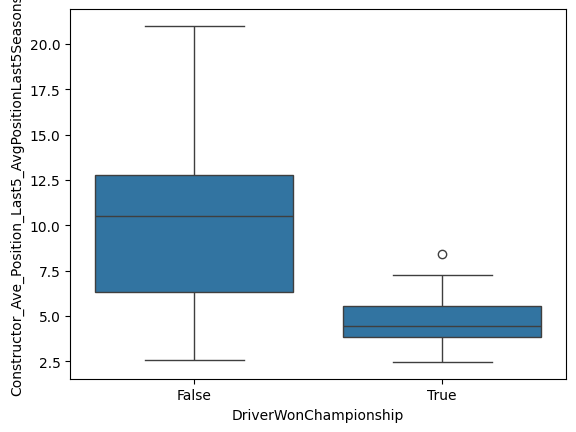

In [157]:
sns.boxplot(y="Constructor_Ave_Position_Last5_AvgPositionLast5Seasons", x = "DriverWonChampionship", data=df_train)

<Axes: xlabel='DriverWonChampionship', ylabel='ConstructorPodiumPercentage'>

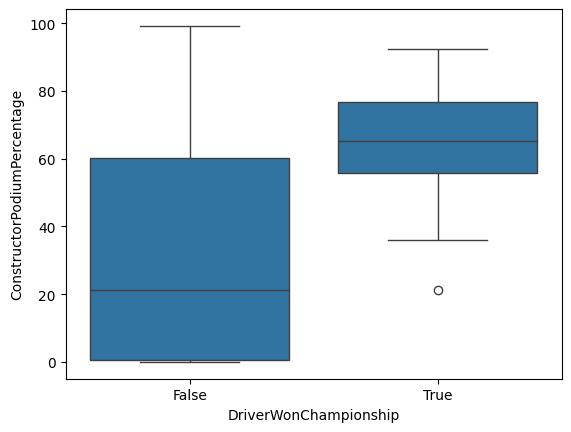

In [158]:
sns.boxplot(y="ConstructorPodiumPercentage", x = "DriverWonChampionship", data=df_train)

<Axes: xlabel='DriverWonChampionship', ylabel='DriverPodiumPercentage'>

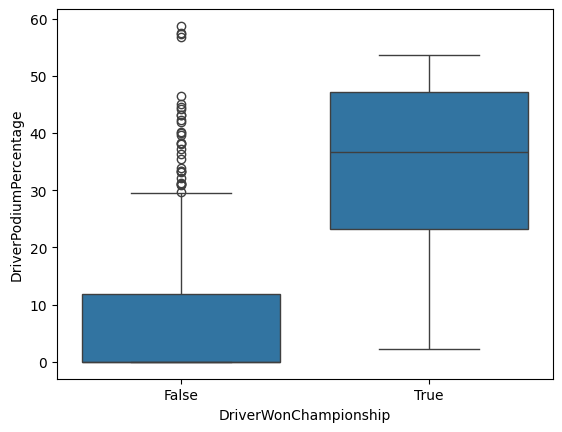

In [159]:
sns.boxplot(y="DriverPodiumPercentage", x = "DriverWonChampionship", data=df_train)

In [160]:
# separating out the outcome variable that we are trying to predict

X_train = df_train.drop('DriverWonChampionship', axis=1)
X_test = df_test.drop('DriverWonChampionship', axis=1)

y_train = df_train['DriverWonChampionship']
y_test = df_test['DriverWonChampionship']

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(285, 17)
(72, 17)
(285,)
(72,)


In [161]:
# Display the first few rows to confirm split
X_train.head()

,PreviousSeasonDriverChampion,PreviousSeasonConstructorChampion,Driver_Ave_Position_Last5_AvgPositionLast5Seasons,Constructor_Ave_Position_Last5_AvgPositionLast5Seasons,DriverCumulativeChampionships,ConstructorCumulativeChampionships,DriverRacesEntered,ConstructorRacesEntered,DriverAge,DriverWinPercentage,DriverPodiumPercentage,ConstructorWinPercentage,ConstructorPodiumPercentage,DriverWinPercentage_PreviousSeason,DriverPodiumPercentage_PreviousSeason,ConstructorWinPercentage_PreviousSeason,ConstructorPodiumPercentage_PreviousSeason
249,False,False,21.00,6.28,0,8,0,701,21,0.000000,0.00000,25.392297,66.619116,0.000000,0.000000,0.000000,0.000000
193,False,False,14.07,21.00,0,0,38,0,24,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
89,False,False,21.00,12.42,0,0,0,100,22,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
77,False,False,3.77,4.64,0,4,119,304,23,6.722689,26.05042,21.052632,60.197368,11.764706,64.705882,11.764706,76.470588
276,False,False,21.00,17.56,0,0,0,20,23,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [162]:
y_train.head()

,DriverWonChampionship
249,False
193,False
89,False
77,True
276,False


In [163]:
# train logistic regression (unscaled)
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

# initialise the model
model = LogisticRegression()

# train the model
model.fit(X_train, y_train)

# generate y_pred
y_pred = model.predict(X_test)

In [164]:
# scaling the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().set_output(transform="pandas")
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [165]:
# check sucess of scaling the data

print(f"The mean number of races entered by drivers in the training set is: {X_train['DriverRacesEntered'].mean()}")
print(f"The standard deviation of races entered by drivers in the training set is: {X_train['DriverRacesEntered'].std()}")
print(f"After scaling, the mean number of races entered by drivers in the training set is: {X_train_scaled['DriverRacesEntered'].mean()}")
print(f"After scaling, the standard deviation of races entered by drivers in the training set is: {X_train_scaled['DriverRacesEntered'].std()}")

print(f"The mean of driver win percentage in the training set is: {X_train['DriverWinPercentage'].mean()}")
print(f"The standard deviation of driver win percentage in the training set is: {X_train['DriverWinPercentage'].std()}")
print(f"After scaling, the mean number of driver win percentage in the training set is: {X_train_scaled['DriverWinPercentage'].mean()}")
print(f"After scaling, the standard deviation of driver win percentage in the training set is: {X_train_scaled['DriverWinPercentage'].std()}")


The mean number of races entered by drivers in the training set is: 93.54035087719298
The standard deviation of races entered by drivers in the training set is: 90.50964437687601
After scaling, the mean number of races entered by drivers in the training set is: 6.232831015439475e-17
After scaling, the standard deviation of races entered by drivers in the training set is: 1.0017590163110905
The mean of driver win percentage in the training set is: 3.169029836962897
The standard deviation of driver win percentage in the training set is: 6.6397574810819755
After scaling, the mean number of driver win percentage in the training set is: 3.1164155077197375e-17
After scaling, the standard deviation of driver win percentage in the training set is: 1.0017590163110914


The dataset has been scalled succesfully shows by the mean of each column progressing closer to 0 and the standard deviation of each column progressing closer to 1.

In [166]:
# train logistic regression (scaled)
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as met

# initialise the model
model_scaled = LogisticRegression()

# train the model
model_scaled.fit(X_train, y_train)

# generate y_pred
y_pred_scaled_model = model.predict(X_test)

### Model Assesment

In [167]:
# Metrics for the Model that uses unscaled data
accuracy = met.accuracy_score(y_test, y_pred)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred)
f1 = met.f1_score(y_test, y_pred)

print("Accuracy stats for the unscaled data model:")
print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2)) # Average of sensitivity and specificity (V useful when unbalanced)

print("F1-score: ", np.round(f1*100.0,2)) # F1 score doesn't care about how many true negatives are being classified

Accuracy stats for the unscaled data model:
Accuracy: 97.2
Balanced Accuracy: 66.67
F1-score:  50.0


In [168]:
# Metrics for the Model that uses scaled data
accuracy = met.accuracy_score(y_test, y_pred_scaled_model)
balanced_accuracy = met.balanced_accuracy_score(y_test, y_pred_scaled_model)
f1 = met.f1_score(y_test, y_pred_scaled_model)

print("Accuracy stats for the scaled data model:")
print("Accuracy:", np.round(accuracy*100.0,1))
print("Balanced Accuracy:", np.round(balanced_accuracy*100.0,2)) # Average of sensitivity and specificity (V useful when unblanced)

print("F1-score: ", np.round(f1*100.0,2))

Accuracy stats for the scaled data model:
Accuracy: 97.2
Balanced Accuracy: 66.67
F1-score:  50.0


Scaled Model performs the same as unscaled model, scaled model will be used moving forwards

In [169]:
# basic confusion matrix
cm = met.confusion_matrix(y_test, y_pred_scaled_model)
print(cm)
                      # PREDICTED
#                     0                     1
# ACTUAL  0    # True Negative       False Positive
#         1    # False Negative      True Positive

[[69  0]
 [ 2  1]]


In [170]:
# confusion matrix plot
def visualize_classification(y_test, y_pred_scaled_model):
    """
    Visualizes the classification performance by displaying a classification report
    and a confusion matrix heatmap.
    """
    # Generate and print the classification report
    from sklearn.metrics import classification_report
    from sklearn.metrics import confusion_matrix
    cr = classification_report(y_test, y_pred_scaled_model)
    print("Classification Report:")
    print(cr)
    # Generate the confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred_scaled_model.round())

    # Create the heatmap
    plt.figure(figsize=(10, 7))
    sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, fmt='.2%', cmap='Blues')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.title('Confusion Matrix Heatmap')
    plt.show()

Classification Report:
              precision    recall  f1-score   support

       False       0.97      1.00      0.99        69
        True       1.00      0.33      0.50         3

    accuracy                           0.97        72
   macro avg       0.99      0.67      0.74        72
weighted avg       0.97      0.97      0.97        72



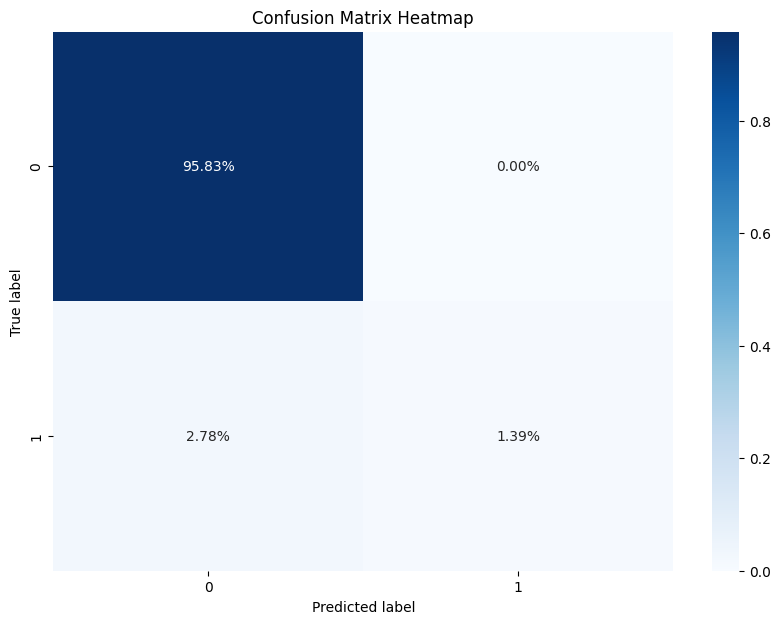

In [171]:
visualize_classification(y_test, y_pred_scaled_model)

In [172]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

def plot_roc_cm(y_true, y_pred, model, name):
    # compute fpr and tpr for roc curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # compute the confusion matrix
    y_pred_binary = np.where(y_pred > 0.5, 1, 0)
    mat = confusion_matrix(y_true, y_pred_binary)
    cr = classification_report(y_true, y_pred_binary)
    print(cr)

    # plot the ROC curve
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
    ax1.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(roc_auc))
    ax1.plot([0, 1], [0, 1], 'k--')
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax1.set_title('ROC Curve of {}'.format(name))
    ax1.legend(loc='lower right')

    # plot the confusion matrix
    names = ["True Negative", "False Positive", "False Negative", "True Positive"]
    counts = ["{0:0.0f}".format(value) for value in mat.flatten()]
    percents = ["{0:.2%}".format(value) for value in mat.flatten()/np.sum(mat)]
    labels = ["{}\n{}\n{}".format(a, b, c) for a, b, c in zip(names, counts, percents)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(mat, annot=labels, fmt="", cmap="Blues", ax=ax2)
    ax2.set(xlabel="Predicted", ylabel="Actual",
       title='Confusion Matrix of {}'.format(name))

    plt.tight_layout()
    plt.show()

              precision    recall  f1-score   support

       False       0.97      1.00      0.99        69
        True       1.00      0.33      0.50         3

    accuracy                           0.97        72
   macro avg       0.99      0.67      0.74        72
weighted avg       0.97      0.97      0.97        72



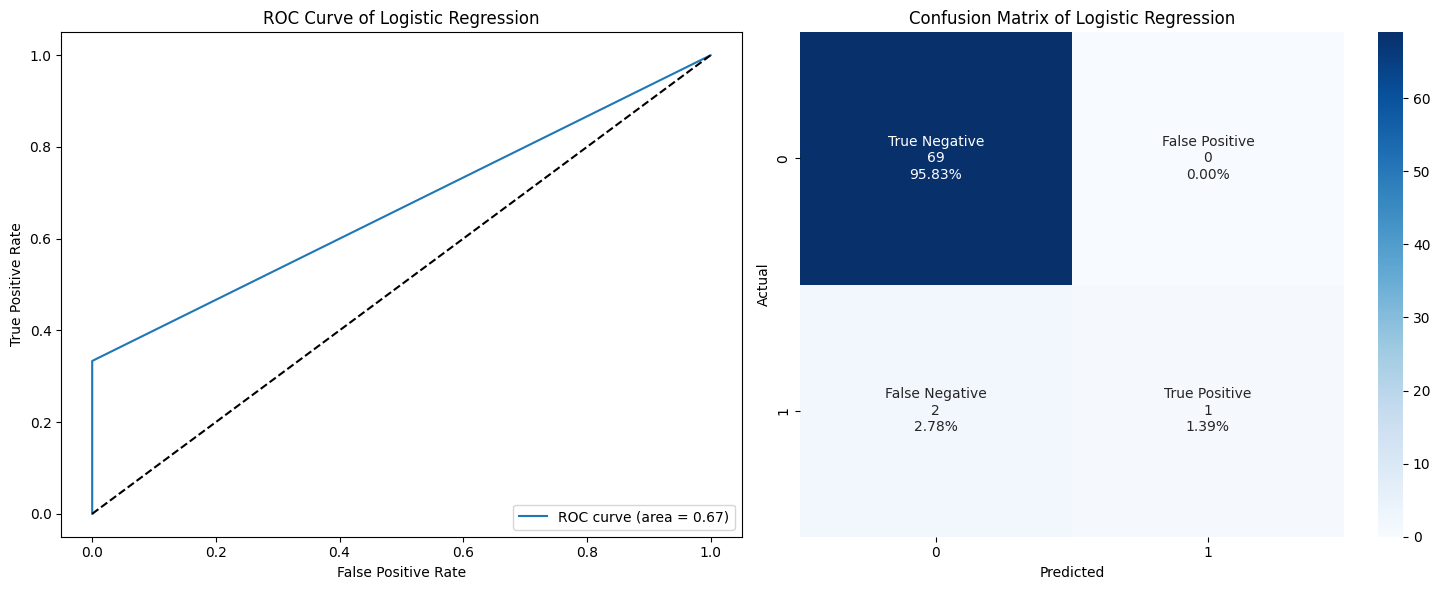

In [173]:
plot_roc_cm(y_test, y_pred_scaled_model, model_scaled, 'Logistic Regression')

In [174]:
coeff_df = pd.DataFrame(zip(X_train.columns, model_scaled.coef_[0]))
coeff_df.columns = ["feature","coefficient"]
coeff_df['exp'] = np.exp(coeff_df['coefficient'])
coeff_df

,feature,coefficient,exp
0,PreviousSeasonDriverChampion,0.073841,1.076636
1,PreviousSeasonConstructorChampion,-0.028202,0.972192
2,Driver_Ave_Position_Last5_AvgPositionLast5Seasons,-0.293919,0.745337
3,Constructor_Ave_Position_Last5_AvgPositionLast...,0.249812,1.283785
4,DriverCumulativeChampionships,-0.549375,0.577310
5,ConstructorCumulativeChampionships,-0.765362,0.465165
6,DriverRacesEntered,0.019010,1.019191
7,ConstructorRacesEntered,0.004684,1.004695
8,DriverAge,-0.392433,0.675411
9,DriverWinPercentage,-0.181600,0.833935


Text(0.5, 0, 'Importance')

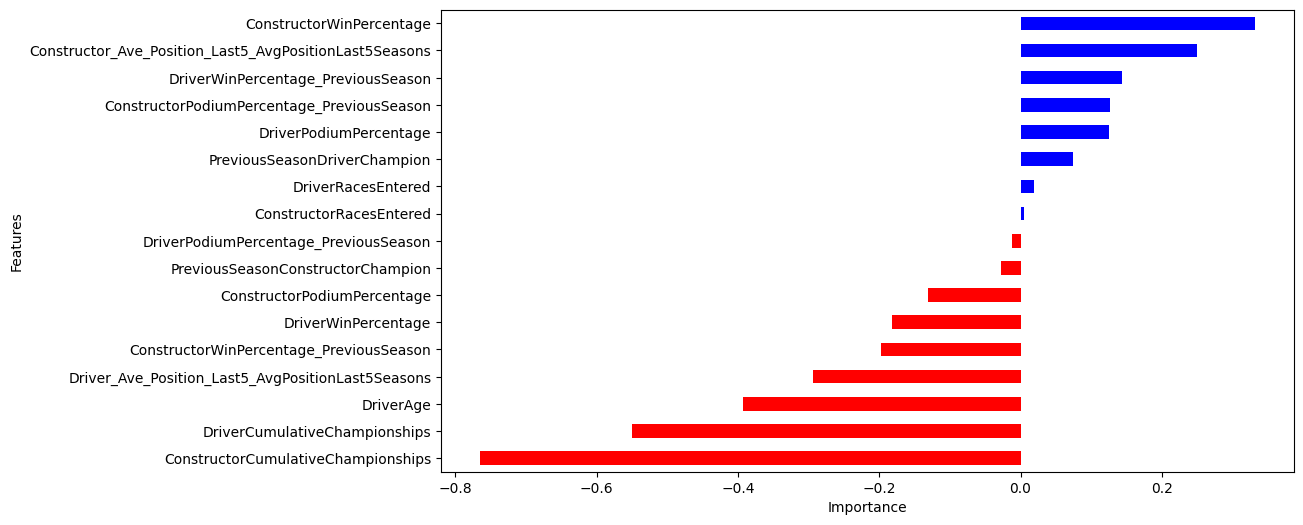

In [175]:
# Visualisation of the coefficients

coeff = list(model_scaled.coef_[0])
labels = list(X_train.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [176]:

# Get the intercept
intercept = model_scaled.intercept_[0]
print(f"Intercept: {intercept}")

# Get the coefficients
coefficients = model_scaled.coef_[0]
print(f"Coefficients: {coefficients}")


Intercept: 0.0515953032413143
Coefficients: [ 0.07384144 -0.02820231 -0.29391864  0.2498124  -0.54937537 -0.76536228
  0.01900964  0.00468379 -0.3924333  -0.1815997   0.12528319  0.33157505
 -0.13070225  0.14431592 -0.01260676 -0.19744666  0.12691667]


In [177]:
# Feature names (replace with your actual feature names)
feature_names = [
    "PreviousSeasonDriverChampion", "PreviousSeasonConstructorChampion",
    "Driver_Ave_Position_Last5_AvgPositionLast5Seasons", "Constructor_Ave_Position_Last5_AvgPositionLast5Seasons",
    "DriverCumulativeChampionships", "ConstructorCumulativeChampionships",
    "DriverRacesEntered", "ConstructorRacesEntered", "DriverAge",
    "DriverWinPercentage", "DriverPodiumPercentage", "ConstructorWinPercentage",
    "ConstructorPodiumPercentage", "DriverWinPercentage_PreviousSeason",
    "DriverPodiumPercentage_PreviousSeason", "ConstructorWinPercentage_PreviousSeason",
    "ConstructorPodiumPercentage_PreviousSeason"
]

# Create the equation
equation = f"logit(p) = {intercept:.4f}"
for coef, feature in zip(coefficients, feature_names):
    equation += f" + ({coef:.4f} * {feature})"


# Wrap the text
wrapped_equation = textwrap.fill(equation, width=150)

print(f"Final Equation:\n{wrapped_equation}")



Final Equation:
logit(p) = 0.0516 + (0.0738 * PreviousSeasonDriverChampion) + (-0.0282 * PreviousSeasonConstructorChampion) + (-0.2939 *
Driver_Ave_Position_Last5_AvgPositionLast5Seasons) + (0.2498 * Constructor_Ave_Position_Last5_AvgPositionLast5Seasons) + (-0.5494 *
DriverCumulativeChampionships) + (-0.7654 * ConstructorCumulativeChampionships) + (0.0190 * DriverRacesEntered) + (0.0047 * ConstructorRacesEntered) +
(-0.3924 * DriverAge) + (-0.1816 * DriverWinPercentage) + (0.1253 * DriverPodiumPercentage) + (0.3316 * ConstructorWinPercentage) + (-0.1307 *
ConstructorPodiumPercentage) + (0.1443 * DriverWinPercentage_PreviousSeason) + (-0.0126 * DriverPodiumPercentage_PreviousSeason) + (-0.1974 *
ConstructorWinPercentage_PreviousSeason) + (0.1269 * ConstructorPodiumPercentage_PreviousSeason)
